# Machine Learning in Exoplanet Exploration
### Machine Learning Engineer Nanodegree Capstone Project 

### Introduction

In [2]:
# Import basic libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

# Embed plots in the notebook
%matplotlib inline

# Add extension to reload modules automatically, in case they have been updated
%load_ext autoreload
%autoreload 2

---

### Kaggle dataset exploration

We will start by exploring the exoplanet dataset available on Kaggle ([Exoplanet Hunting in Deep Space](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data/version/3)). This dataset includes the flux time-series recorded by the Kepler telescope for 5657 stars. Each time-series is labelled as `2` or `1`, depending on whether the corresponding star has been classified as being orbited by at least one exoplanet or not, respectively.

Let's load the data:

In [2]:
# Load training and test datasets
try:
    flux_train = pd.read_csv("Data\light_curve_Train.csv")
    print('Training dataset loaded: {} samples with {} features.'.format(*flux_train.shape))
except:
    print('Training dataset could not be loaded.')
    
try:
    flux_test = pd.read_csv("Data\light_curve_Test.csv")
    print('Test dataset loaded: {} samples with {} features.'.format(*flux_test.shape))
except:
    print('Test dataset could not be loaded.')

Training dataset loaded: 5087 samples with 3198 features.
Test dataset loaded: 570 samples with 3198 features.


It can be seen that the dataset is already split into a training and a test dataset, consisting of 5087 and 570 samples respectively. The next step will be to separate the labels from the flux data and store them in two new dataframes, `y_flux_train` and `y_flux_test`: 

In [3]:
# Seperate labels from other features
y_flux_train = flux_train['LABEL']
x_flux_train = flux_train.drop(['LABEL'],axis=1)

y_flux_test = flux_test['LABEL']
x_flux_test = flux_test.drop(['LABEL'],axis=1)

What do the flux data look like? By displaying the first 5 samples in our dataset we can see that each sample consists of 3197 flux measurements, of both positive and negative values with magnitudes ranging $10^0$ to $10^3$. According to some Kaggle users, the interval between each point in the series is 36 minutes, meaning that each time-series in our dataset corresponds to a period of approximately 80 days.

In [4]:
x_flux_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


Since it is very hard to obtain a understanding of the data by just looking at the numbers at the table above, we can now plot the flux time-series for a number of randomely chosen samples. 

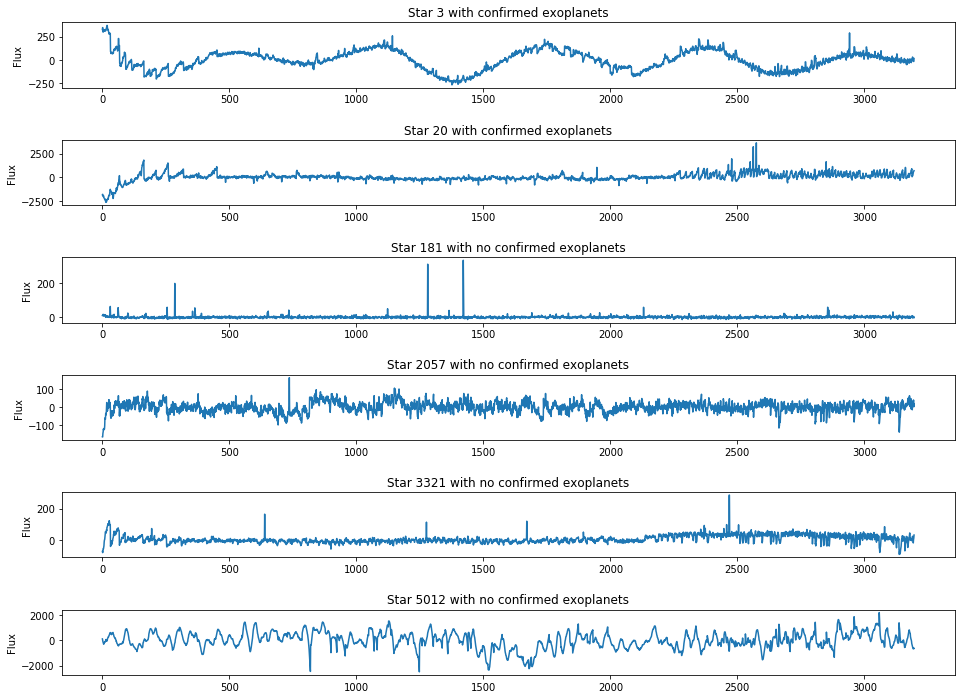

In [5]:
# Choose samples to visualise
samples = [3,20,181,2057,3321,5012]
n_samples = len(samples)


# Plot time-series data for the selected samples 
fig = plt.figure(figsize=(16,len(samples)*2))
plt.subplots_adjust(hspace=0.8)

for i in range(n_samples):
    plt.subplot(n_samples,1,i+1)
    plt.plot(x_flux_train.iloc[samples[i]].values.tolist())
    plt.ylabel('Flux')
    title = 'Star {} with confirmed exoplanets'.format(samples[i]) if y_flux_train.iloc[samples[i]] == 2 else 'Star {} with no confirmed exoplanets'.format(samples[i])
    plt.title(title)

plt.show()

The first two time-series correspond to stars with at least one confirmed exoplanet, while the other four show the flux of stars with no confirmed exoplanets. A first observation is that the data seem to be quite noisy. Looking at the first plot, it is evident that there is some kind of periodic variation that one would expect to see in the case of a star that is orbitted by a planet. This is because as the planet moves around the sun it will periodically be positioned between the star and the telescope, blocking some of the star's light and therefore resulting in a dip in measured light intensity. However, this pattern is not at all clear in the second plot, which also corresponds to a star with an exoplanet. This is a first indication of the fact that exoplanet detection is not a straightforward process, as conclusions cannot always be drawn by simply having a quick look at the measured flux time-series. 

Let's know explore the composition of the training and test datasets: 

Confirmed exoplanet-stars in training set:  37
Confirmed exoplanet-stars in test set:  5


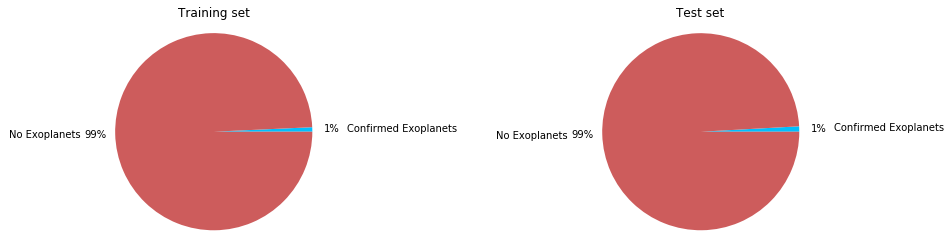

In [6]:
# Count number of exoplanet stars in the training and test datasets
n_exoplanets_train = y_flux_train[y_flux_train == 2].count()
n_exoplanets_test = y_flux_test[y_flux_test == 2].count()

print('Confirmed exoplanet-stars in training set: ', n_exoplanets_train)
print('Confirmed exoplanet-stars in test set: ', n_exoplanets_test)

# Plot pie chart for exoplanet vs non-exoplanet stars in the training and test datasets
fig = plt.figure(figsize=(16,4))
colors = ['deepskyblue','indianred']

plt.subplot(1,2,1)
plt.pie([n_exoplanets_train, y_flux_train.size-n_exoplanets_train], colors=colors, 
        labels=['Confirmed Exoplanets', 'No Exoplanets'], autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.35) 
plt.title('Training set')
plt.axis('equal')

plt.subplot(1,2,2)
plt.pie([n_exoplanets_test, y_flux_test.size-n_exoplanets_test], colors=colors, 
        labels=['Confirmed Exoplanets', 'No Exoplanets'], autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.35) 
plt.title('Test set')
plt.axis('equal')

plt.show()

The two pie charts above show that stars with confirmed exoplanets constitute only 1\% of the training and test datasets. In other words 37 out of the 5087 training samples and 5 out of the 570 samples in the test dataset actually have an exoplanet. A class imbalance was expected even before analysing this dataset (since very few of the stars have been confirmed of having an exoplanet), but the imbalance in this dataset is found to be quite big. Imbalanced data are often the source of great difficulty in training classification models of adequate performance. In this case, it would be like looking for needles in a haystack. For this reason, it was decided to try an imrpove the balance in the dataset by creating a new flux dataset from scratch rather than simply using the Kaggle dataset. We will do this in the next section.

---

### Custom dataset creation using K2 data

As discussed above, the exoplanet dataset that is available on Kaggle is largely imbalanced. This will most probably have a negative effect on the classification that we are aiming to perform, so we should try to create a better, more balanced dataset.

Luckily, the Kaggle dataset only includes a small subset of the data recorded by the Kepler telescope. In particular, the samples are collected primarily from Campaign 3 of the so called K2 mission. The mission has completed 20 campaigns (0-19), each of which scans a different patch of stars. In total, around 300,000 stars have been monitored to date.

The measured flux data for a large number of these stars have been analysed by astrophysicists to determine whether the stars are candidates for having one or more exoplanets or not. The NASA Exoplanet Archive provides a [database](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=k2candidates) of these candidates, with a number of features/characteristics calculated for each star based on the flux data. We will now import and explore this dataset:

In [2]:
# Load K2 candidates dataset
try:
    k2_cands = pd.read_csv("Data\k2candidates.csv",skiprows=range(149),header=1)
    print('K2 candidates dataset loaded: {} samples with {} features.'.format(*k2_cands.shape))
except:
    print('K2 candidates dataset could not be loaded.')

K2 candidates dataset loaded: 1737 samples with 147 features.


There are 1737 items in the list and each row comes with a set of 147 features. Let's take a peek at the candidate data:

In [3]:
k2_cands.head()

,rowid,epic_name,tm_name,epic_candname,pl_name,k2c_refdisp,k2c_reflink,k2c_disp,k2c_note,k2_campaign,...,st_bmvjlim,st_jmh2,st_jmh2err,st_jmh2lim,st_hmk2,st_hmk2err,st_hmk2lim,st_jmk2,st_jmk2err,st_jmk2lim
0,1,EPIC 201092629,2MASS J12045739-0648180,EPIC 201092629.01,K2-241 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=http://a...,CONFIRMED,NaN,10,...,0.0,0.454,0.032,0.0,0.055,0.031,0.0,0.509,0.033,0.0
1,2,EPIC 201102594,2MASS J11592060-0631042,EPIC 201102594.01,K2-242 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=http://a...,CONFIRMED,NaN,10,...,0.0,0.606,0.032,0.0,0.238,0.034,0.0,0.844,0.033,0.0
2,3,EPIC 201110617,2MASS J12104805-0617391,EPIC 201110617.01,K2-156 b,CONFIRMED,<a refstr=MAYO_ET_AL__2018 href=http://adsabs....,CONFIRMED,NaN,10,...,0.0,0.567,0.039,0.0,0.181,0.034,0.0,0.748,0.038,0.0
3,4,EPIC 201110617,2MASS J12104805-0617391,EPIC 201110617.01,K2-156 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=http://a...,CONFIRMED,NaN,10,...,0.0,0.567,0.039,0.0,0.181,0.034,0.0,0.748,0.038,0.0
4,5,EPIC 201111557,2MASS J12152316-0616056,EPIC 201111557.01,NaN,CANDIDATE,<a refstr=MAYO_ET_AL__2018 href=http://adsabs....,CANDIDATE,NaN,10,...,0.0,0.482,0.033,0.0,0.171,0.030,0.0,0.653,0.030,0.0


As we can see each row has a `epic_name` column, which is the name of the target star as well as a `k2_campaign` column, which indicates whick K2 campaign collected the flux data for this particular star. Let's save these two variables in a separate dataframe to have them handy.

In [4]:
# Extract candidate star name and campaign number and store in new dataframe
k2_cand_names = k2_cands[['epic_name','k2_campaign']]
k2_cand_names.head()

,epic_name,k2_campaign
0,EPIC 201092629,10
1,EPIC 201102594,10
2,EPIC 201110617,10
3,EPIC 201110617,10
4,EPIC 201111557,10


Another important column of the imported dataset is the `k2c_disp`. This column essentially provides the scientists' disposition on whether the candidate has been `CONFIRMED` to have an exoplanet, is a `FALSE POSITIVE` (i.e. doesn't have any exoplanets but was considered as a candidate because of some other effect such as being part of a binary star system, being affected by background objects or simply due to astrophysical stellar variability), or is still at a `CANDIDATE` status.

We will now visualise the number of objects by category and by campaign. It is important to note that the dataset includes some duplicates (i.e. same stars with identical `epic_name` but some difference on other features, as the same star may be studied by different groups of scientists. The duplicates will be taken care of later on. 

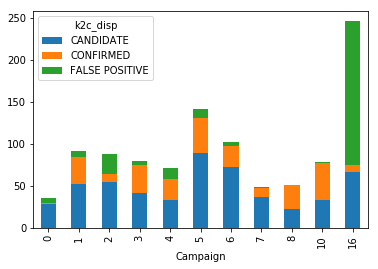

In [5]:
# Count candidates by campaign and disposition (Confirmed, Candidate or False positive)
candidates_count = k2_cands.groupby(['k2_campaign','k2c_disp'])['epic_name'].nunique()
candidates_count = pd.DataFrame(candidates_count)

# Re-index count dataframe including all combinations of k2_campaign and k2c_disp
new_index = pd.MultiIndex.from_product(candidates_count.index.levels,names=candidates_count.index.names)
candidates_count = candidates_count.reindex(new_index, fill_value=0)
candidates_count.reset_index(level=0, inplace=True)
candidates_count.reset_index(level=0, inplace=True)

# Plot stacked bar chart to visualise objects of interest by campaign
piv = candidates_count.pivot(values='epic_name', columns='k2c_disp', index='k2_campaign')
piv.plot.bar(stacked=True)
plt.xlabel('Campaign')

plt.show()

It can be seen that each campaign consists of a different number and mixture of objects. Campaign 16 has the largest number of objects - however most of them have been classified as `FALSE POSITIVES`. Campaigns 1, 3, 5 and 10 stand out for their large number of `CONFIRMED` and `CANDIDATE` objects.

The chart above has been used to decide which campaigns will be used to compile the final dataset. NASA provides the flux data for each star to the public in the form of an FITS file per target object/star. [FITS](https://en.wikipedia.org/wiki/FITS) stands for Flexible Image Transport System and is a commonly used file type in astronomy. Each campaign contains thousands of these files (the above chart only shows stars that have been classified as candidates). Due to the large size of these files, a choice had to be made with regards to which campaigns will be downloaded and used. It has been decided to use campaigns 1, 3 and 5 (the explanation for not using 10 is provided below).

A function called `flux_compiler` has been created to process the individual .fits files for a chosen campaign and return a single combined and labelled dataset. The labeling is done by searching for the name of each star in the list of candidates (`k2_cand_names`). If the name is found, the star is labelled as `1` (i.e. positive/candidate), otherwise `0`.  

In [ ]:
# Compile all kepler fits files for a chosen campaign into a single flux time-series dataset
from flux_load import flux_compiler
campaign = 5
flux_compiler(campaign, k2_cand_names)

Provided that the flux_compiler function has been run for each of the required campaigns, we can now load the combined flux datasets. The labels are seperated from the flux data and stored in different dataframes:

In [6]:
# Load flux datasets for each chosen campaign
try:
    flux_1 = pd.read_csv("Data\c1_lightcurves.csv")
    flux_3 = pd.read_csv("Data\c3_lightcurves.csv")
    flux_5 = pd.read_csv("Data\c5_lightcurves.csv")
    labels_1 = pd.read_csv("Data\c1_labels.csv")
    labels_3 = pd.read_csv("Data\c3_labels.csv")
    labels_5 = pd.read_csv("Data\c5_labels.csv")

    
    flux_1.columns.values[0] = "epic_name"
    flux_3.columns.values[0] = "epic_name"
    flux_5.columns.values[0] = "epic_name"
    labels_1.columns.values[0] = "epic_name"
    labels_3.columns.values[0] = "epic_name"
    labels_5.columns.values[0] = "epic_name"
    
    print('Datasets loaded successfully')
except:
    print('Datasets could not be loaded.')

Datasets loaded successfully


Unfortunately, it was observed that different stars in each campaign have different lengths of time-series. This means that we can't simply stack the flux data from each campaign one under the other and use the resulting dataset for the classification task. We will need to first edit the length of the time-series so that it is consistent amongst all the samples. Let's have a look at some statistics regarding the lengths of the flux data in each campaign:

In [7]:
# Calculate length of time-series for each candidate ('label' = 1) in each campaign
flux_len_1 = flux_1.loc[labels_1.index[labels_1['label']==1]].count(axis=1)
flux_len_3 = flux_3.loc[labels_3.index[labels_3['label']==1]].count(axis=1)
flux_len_5 = flux_5.loc[labels_5.index[labels_5['label']==1]].count(axis=1)

In [8]:
# Time-series length statistics for each campaign
print('Campaign 1 time-series lengths:')
print('Min = {:d}'.format(flux_len_1.min()))
print('Max = {:d}'.format(flux_len_1.max()))
print('Mean = {:.0f}'.format(flux_len_1.mean()))

print('\nCampaign 3 time-series lengths:')
print('Min = {:d}'.format(flux_len_3.min()))
print('Max = {:d}'.format(flux_len_3.max()))
print('Mean = {:.0f}'.format(flux_len_3.mean()))

print('\nCampaign 5 time-series lengths:')
print('Min = {:d}'.format(flux_len_5.min()))
print('Max = {:d}'.format(flux_len_5.max()))
print('Mean = {:.0f}'.format(flux_len_5.mean()))

Campaign 1 time-series lengths:
Min = 3286
Max = 3556
Mean = 3530

Campaign 3 time-series lengths:
Min = 2984
Max = 3190
Mean = 3163

Campaign 5 time-series lengths:
Min = 3348
Max = 3457
Mean = 3437


Let's now combine the 3 campaigns' datasets into a single big dataset and calculate the same length statistics:

In [9]:
# Combine the flux series from each of the chosen campaigns
flux_raw = pd.concat([flux_1,flux_3,flux_5], ignore_index=True, sort=False)
labels = pd.concat([labels_1,labels_3,labels_5], ignore_index=True, sort=False)
print('Combined flux dataset: size {:d} x {:d}'.format(*flux_raw.shape))

Combined flux dataset: size 64254 x 3556


In [10]:
# Isolate data for all stars with exoplanet candidates in the combined dataset
exoplanet_cands = flux_raw.loc[labels.index[labels['label']==1]]

# Calculate length of time-series for each candidate ('label' = 1) in the combined dataset
cands_flux_len = exoplanet_cands.count(axis=1)-1

# Number of exoplanet candidates in the combined dataset
print('The dataset contains {:d} exoplanet candidates.'.format(len(exoplanet_cands)))

# Time-series length statistics
print('\nCombined dataset time-series lengths:')
print('Min = {:d}'.format(cands_flux_len.min()))
print('Max = {:d}'.format(cands_flux_len.max()))
print('Mean = {:.0f}'.format(cands_flux_len.mean()))

The dataset contains 303 exoplanet candidates.

Combined dataset time-series lenghts:
Min = 2983
Max = 3555
Mean = 3392


It was found that the minimum flux time-series length in our data is 2,983 and the maximum is 3,555, with a mean of 3,392. However, Campaign 3 has in general a slightly lower mean of 3,163. 

There are two options to overcome the issue of different lengths. The first one is to simply try to fill or pad the smaller time-series in some way, so that all samples will have exactly 3,555 time-series points (the max). This would however alter the properties of the time-series, so it is deemed unfavourable in this case. The second option is to choose an appropriate threshold/minimum length and then truncate longer time-series to this length and discard all the time-series with fewer points than the chosen minimum. Setting the threshold length to a very high value means that many samples will be discarded, so we will loose many of the datapoints/stars that we collected. On the other hand, a very small threshold length will mean that longer time-series will be truncated even more, so we may loose some useful information. In this case, the effect that we are trying to detect (i.e. the transit of planets in front of stars) is periodic and should therefore exist throughout the time-series rather than just in the end of it. Therefore, we can afford truncating series a bit more.

Taking the above into consideration, it was chosen to use Campaign 3's mean length as a threshold. The following blocks of code perform the truncation and discarding of samples described above:

In [11]:
# Set minimum time-series length required to keep a given sample in the dataset 
min_flux_len = int(flux_len_3.mean())+1

# Truncate flux dataset by only keeping the first min_flux_len columns
truncated_flux_raw = flux_raw[flux_raw.columns[:min_flux_len]]

In [12]:
# Find rows with missing values (i.e. samples with less than min_flux_len points in their flux time-series)
na_rows = pd.isnull(truncated_flux_raw).any(1).nonzero()[0]

# Remove rows with missing values from the flux and label sets
truncated_flux_data = truncated_flux_raw.drop(truncated_flux_raw.index[na_rows])
truncated_labels = labels.drop(labels.index[na_rows])

In [13]:
# Count number of exoplanet candidates in the truncated dataset
truncated_exoplanet_cands = truncated_flux_data.loc[truncated_labels.index[truncated_labels['label']==1]]
print('The truncated dataset has size {:d} x {:d} and contains {:d} exoplanet candidates.'.format(*truncated_flux_data.shape,len(truncated_exoplanet_cands)))

The truncated dataset has size 60645 x 3163 and contains 279 exoplanet candidates.


Finally, even if we now have an improved dataset compared to the one on Kaggle, the nature of the data means that there will still be some imbalance. One way of mitigating this is through undersampling. In other words, we are going to use all the time-series of stars with exoplanet candidates (279) plus a given number of randomely selected non-exoplanet stars. This number was chosen to be 3,721, so that we end up with a final dataset of 4,000 samples:

In [14]:
import random

# Set random seed to ensure repeatability of random sample selection
random.seed(42)

# Set number of non-exoplanet stars to be included in the dataset
n_non_exoplanet = 4000-len(truncated_exoplanet_cands)

# Randomly select 'n_non_exoplanet' non-exoplanet stars to include in the dataset 
non_exoplanets_sample = random.sample(list(truncated_labels.index[truncated_labels['label']==0]),n_non_exoplanet)

# Indices of exoplanet-candidate stars and selected non-exoplanet stars
full_sample = list(truncated_labels.index[truncated_labels['label']==1]) + non_exoplanets_sample

# Extract the specified sample from the full dataset  
flux_sample = truncated_flux_data.loc[full_sample,:]
labels_sample = truncated_labels.loc[full_sample,:]

# Save flux and label sample datasets
flux_sample.to_csv("Data\\flux_sample.csv")
labels_sample.to_csv("Data\\labels_sample.csv")

---

### Dataset exploration and pre-processing

The dataset that was created was saved in two .csv files; one containing the flux values and the other one the corresponding star labels (0: no exoplanets candidates, 1: exoplanet candidates). We can now load these two files: 

In [3]:
# Load custom dataset
try:
    flux = pd.read_csv("Data/flux_sample.csv", index_col=1)
    flux.drop('Unnamed: 0', axis=1, inplace=True)
    labels = pd.read_csv("Data/labels_sample.csv",index_col=1)
    labels.drop('Unnamed: 0', axis=1, inplace=True)
    print('Dataset loaded: {} samples with {} features.'.format(*flux.shape))
except:
    print('Training dataset could not be loaded.')

Dataset loaded: 4000 samples with 3162 features.


The primary reason for creating a dataset from scratch was to obtain an improved class balance compared to the Kaggle dataset. Let's see what we have achieved:

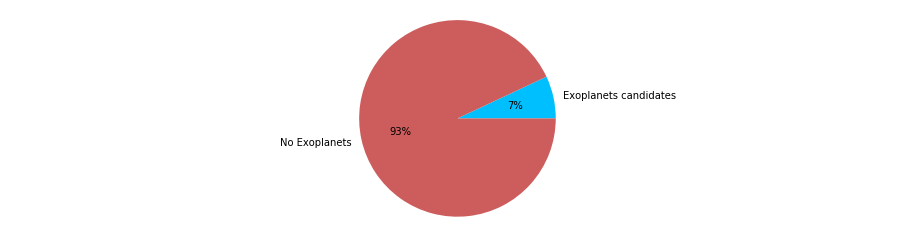

In [4]:
# Count number of exoplanet candidates in the dataset
n_candidates = labels[labels['label']==1].count()['label']

# Plot pie chart for exoplanet-candidate vs non-exoplanet stars in the training and test datasets
fig = plt.figure(figsize=(16,4))
colors = ['deepskyblue','indianred']

plt.pie([n_candidates, flux.shape[0]-n_candidates], colors=colors, 
        labels=['Exoplanets candidates', 'No Exoplanets'], autopct='%1.0f%%') 
plt.axis('equal')
plt.show()

The new dataset is still imbalanced, however the ratio of positives (stars with exoplanet candidates) and negatives (stars with no exoplanets) is considerably better. We know have 7\% of positive samples, while the Kaggle dataset only had 1\%. While definitely an improvement, the ratio is still low and other techniques will need to be employed later on to mitigate the class imbalance problem.

Let's now see what the data looks like:

In [5]:
flux.head()

,0,1,2,3,4,5,6,7,8,9,...,3152,3153,3154,3155,3156,3157,3158,3159,3160,3161
epic_name,,,,,,,,,,,,,,,,,,,,,
EPIC 201126503,671.556213,684.749084,675.719666,690.858154,691.162415,694.080627,689.405396,695.643372,708.252686,693.001953,...,690.592529,682.658630,696.794556,706.005615,701.794312,705.358887,697.711731,705.820618,696.314453,694.699280
EPIC 201155177,16629.332031,16641.957031,16602.951172,17132.261719,17137.101562,17124.759766,17143.548828,17124.330078,17136.015625,17140.457031,...,17121.007812,17114.365234,17110.667969,17117.734375,17141.994141,17120.945312,17110.550781,17129.117188,17114.902344,17121.421875
EPIC 201176672,32872.589844,32855.265625,32908.257812,32760.240234,32744.470703,32762.095703,32766.125000,32743.871094,32752.191406,32760.648438,...,32757.542969,32714.050781,32726.222656,32655.695312,32670.791016,32671.843750,32708.904297,32734.306641,32729.978516,32753.453125
EPIC 201182911,8287.248047,8292.537109,8259.041992,8246.769531,8238.206055,8234.342773,8228.845703,8226.708984,8231.898438,8221.932617,...,8183.235352,8185.875000,8218.062500,8240.030273,8245.794922,8254.473633,8261.513672,8298.529297,8291.562500,8298.814453
EPIC 201197348,11784.993164,11810.388672,11807.846680,11473.319336,11481.638672,11472.532227,11466.393555,11489.285156,11471.574219,11475.936523,...,11511.348633,11507.869141,11504.044922,11525.999023,11544.324219,11528.520508,11530.051758,11521.109375,11508.415039,11509.752930


We have a dataframe in which each row corresponds to a star with a unique `epic_name` value and has 3162 flux time-series measurements. 

Values in different rows seem to vary widely. A pre-processing technique that is very commonly used in order to improve the performance of classification or regression algorithms is normalisation. Its goal is essentially to rescale the values in a dataset, preserving the differences between them. Two different normailisation approached will be tested: min-max normalisation which simly rescales values in the range 0 to 1 and standardisation which results in a set of values that has 0 mean and unit variance. The two pre-processing steps are defined below and applied to the raw flux data:

In [6]:
# Normalise (min-max) or standardise flux data
def normalise(x): 
    x_norm = (x - min(x)) / (max(x) - min(x)) 
    return x_norm

def standardise(x):
    x_std = (x-np.mean(x)) / np.std(x)
    return x_std

flux_norm = flux.apply(lambda row : normalise(row), axis = 1)
flux_std = flux.apply(lambda row : standardise(row), axis = 1)

Let's have a look at how the min-max normaliser has changed the values in the first 5 rows of the dataset:

In [7]:
flux_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,3152,3153,3154,3155,3156,3157,3158,3159,3160,3161
epic_name,,,,,,,,,,,,,,,,,,,,,
EPIC 201126503,0.050541,0.072130,0.057354,0.082127,0.082625,0.087400,0.079750,0.089958,0.110592,0.085635,...,0.081692,0.068709,0.091842,0.106915,0.100023,0.105857,0.093342,0.106612,0.091056,0.088413
EPIC 201155177,0.040426,0.059773,0.000000,0.811124,0.818540,0.799628,0.828420,0.798969,0.816876,0.823682,...,0.793878,0.783699,0.778033,0.788862,0.826038,0.793782,0.777854,0.806305,0.784522,0.794513
EPIC 201176672,0.560614,0.551761,0.578839,0.503207,0.495149,0.504155,0.506213,0.494842,0.499094,0.503415,...,0.501828,0.479605,0.485825,0.449787,0.457501,0.458039,0.476976,0.489955,0.487744,0.499739
EPIC 201182911,0.947444,0.948960,0.939359,0.935841,0.933387,0.932279,0.930704,0.930091,0.931579,0.928722,...,0.917630,0.918387,0.927613,0.933910,0.935562,0.938049,0.940067,0.950677,0.948680,0.950759
EPIC 201197348,0.698963,0.742137,0.737816,0.169096,0.183239,0.167757,0.157321,0.196239,0.166129,0.173545,...,0.233748,0.227833,0.221331,0.258655,0.289809,0.262941,0.265545,0.250342,0.228761,0.231035


As in the case of the Kaggle dataset, it will be useful to visualise the flux series for some randomely chosen samples. The flux values of 3 stars with exoplanet candidates and 3 stars without are shown below:

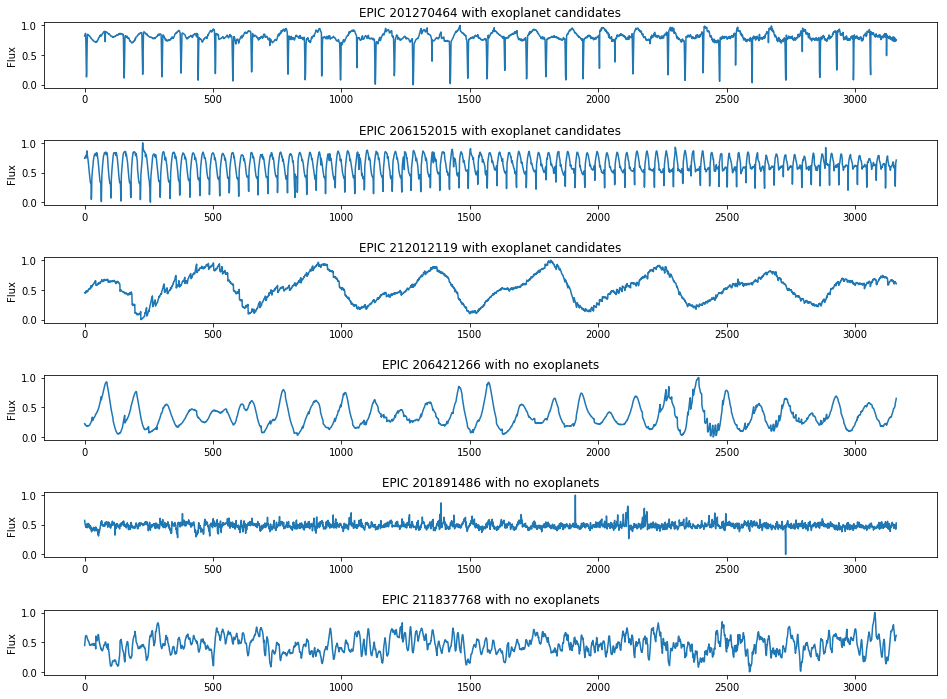

In [8]:
# Choose samples to visualise
samples = [15,120,260,693,2057,3321]
n_samples = len(samples)

# Plot time-series data for the selected samples 
fig = plt.figure(figsize=(16,len(samples)*2))
plt.subplots_adjust(hspace=0.8)

for i in range(n_samples):
    plt.subplot(n_samples,1,i+1)
    plt.plot(flux_norm.iloc[samples[i]].values.tolist())
    plt.ylabel('Flux')
    title = '{} with exoplanet candidates'.format(labels.iloc[samples[i]].name) if labels.iloc[samples[i]].label == 1 else '{} with no exoplanets'.format(labels.iloc[samples[i]].name)
    plt.title(title)

plt.show()

It can be seen that the flux series of the 3 stars with exoplanets nicely and clearly exhibit a periodic reduction of the light intensity. However, one could argue that the 4th plot which corresponds to a non-exoplanet star also has a similar pattern.

Another observation is that the data is noisy. A common technique that is usually encountered in signal pre-processing is smoothing. The signal, in this case the flux time-series data, is passed through a filter, which removes noise, outliers and other unwanted information, effectively smoothing the data. Two different filters will be tested: the median filter and the Savitzky-Golay filter. The median filter works by replacing the value of a data point with the median of all the values in a given window around the data point. On the other hand, the Savitzky-Golay filter fits a polynomial to the the data points within a window.

Both filters are seperately applied to the raw and normalised flux data below. The median filter function in scipy (`mefilt`) is used with its default settings, while the Savitzky-Golay filter (`savgol_filter`) is applied with a polynomial order of 3 and a window size of 15:

In [9]:
from scipy.signal import savgol_filter, medfilt

# Set Savitzky–Golay filter parameters
window = 15
poly = 3

# Apply Savitzky–Golay and median filter to the unnormalised flux data
flux_sg = flux.apply(lambda row : savgol_filter(row, window, poly), axis = 1)
flux_med = flux.apply(lambda row : medfilt(row), axis = 1)

# Apply Savitzky–Golay and median filter to the normalised flux data
flux_norm_sg = flux_norm.apply(lambda row : savgol_filter(row, window, poly), axis = 1)
flux_norm_med = flux_norm.apply(lambda row : medfilt(row), axis = 1)

C:\Users\Alex\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


The following plots show how the filtered data compare with the unfiltered, normalised time-series. It can be seen that both filters remove many of the outliers and smoothen signal. The Savitzky-Golay filter with the chosen configurations appears to result in a more agressive smoothening than the median filter.

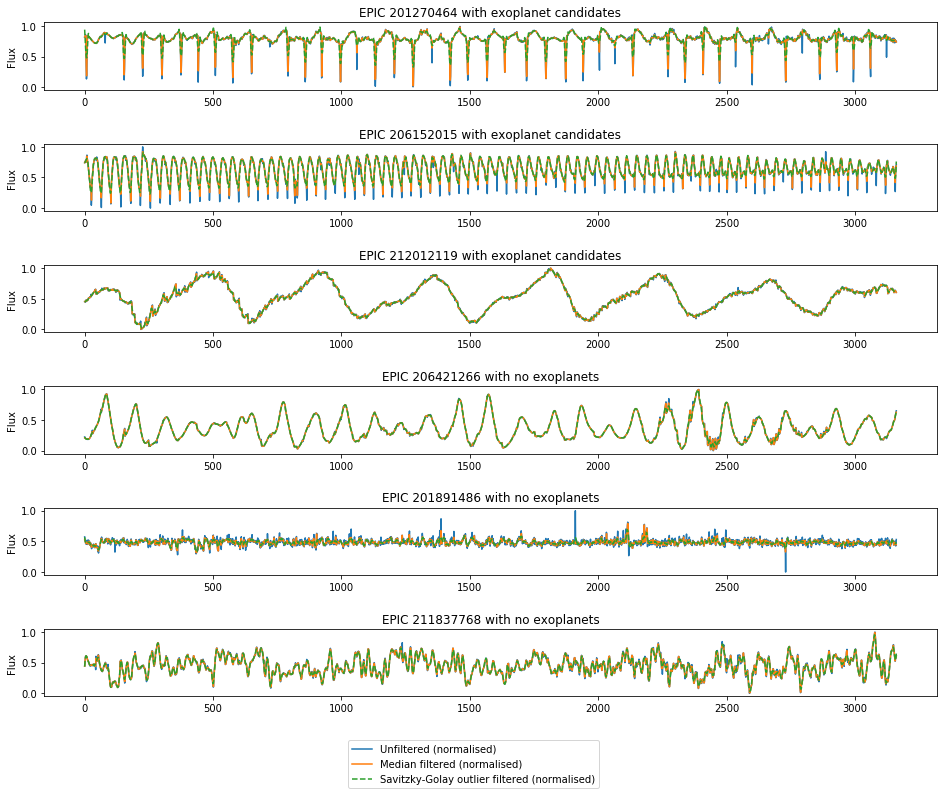

In [10]:
# Choose samples to visualise
samples = [15,120,260,693,2057,3321]
n_samples = len(samples)

# Plot time-series data for the selected samples 
fig = plt.figure(figsize=(16,len(samples)*2))
plt.subplots_adjust(hspace=0.8)

for i in range(n_samples):
    plt.subplot(n_samples,1,i+1)
    plt.plot(flux_norm.iloc[samples[i]].values.tolist())
    plt.plot(flux_norm_med[samples[i]])
    plt.plot(flux_norm_sg[samples[i]],'--')
    plt.ylabel('Flux')
    title = '{} with exoplanet candidates'.format(labels.iloc[samples[i]].name) if labels.iloc[samples[i]].label == 1 else '{} with no exoplanets'.format(labels.iloc[samples[i]].name)
    plt.title(title)

fig.legend(labels=['Unfiltered (normalised)','Median filtered (normalised)', 'Savitzky-Golay outlier filtered (normalised)'],loc="lower center",borderaxespad=0.1)
plt.subplots_adjust(bottom=0.1)    
plt.show()

Considering the nature of the problem and the ultimate goal leads to another possible idea for filtering the data. What we are trying to find are cases where the flux of a star measured by the Kepler telescope decreases as an exoplanet orbits around the star, periodically blocking some of its light. Therefore, we only really care about decreases in flux rather than abrupt high values (like the ones observed in the second to last graph above). This means that we could remove upper outliers without loosing any useful information for the classification task.

The following block of code defines an upper outlier filter, which replaces a certain percentage of the highest flux values with the mean of the values of all points in a window of specified size around them. 

In [11]:
# Define filter that finds and removes upper outliers, since we are only interested in dips of flux

def upper_outliers_filter(x, pct_filter, window_size):
    #x: array
    #pct_filter: percentage of points with highest values to be filtered 
    #window_size: size of filter window - one-sided, i.e. total size will be 
    #             2*window_size+1 (including central point under question)
    
    # make copy of array to be filtered
    x_filtered = list(x)
    
    length = len(x) #length of array
    n_filter = int(pct_filter*len(x))
    top = np.argsort(x)[::-1][:n_filter] #indices of top n_filter points to be filtered

    # for each point calculate mean of its surrounding points within the window size
    for point in top:
        if point-window_size >= 0 and point+window_size<=length:
            mean_surrounding = (np.sum(x[point-(window_size+1):point-1])+np.sum(x[point+1:point+(window_size+1)]))/(2*window_size)
        elif point-window_size<0 and point+2*window_size<=length:
            mean_surrounding = np.sum(x[point+1:point+2*window_size+1])/(2*window_size)
        elif point+window_size>length and point-2*window_size>=0:
            mean_surrounding = np.sum(x[point-(2*window_size+1):point-1])/(2*window_size)
        else:
            mean_surrounding = np.nan

        #if point's value is higher than the mean of the surrounding points reduce its value to mean_surrounding
        if np.isnan(mean_surrounding)==False and x[point]>mean_surrounding:
            x_filtered[point]=mean_surrounding
    
    return x_filtered

The upper outlier filter is then applied to 2 different data series: the median filtered flux data and the median filtered, normalised flux data. This will make it possible to test different combinations of pre-processing techniques and see which one leads to the best classification results.

In [12]:
# Apply upper outlier filter to median filtered flux data
flux_med_up = flux_med.apply(lambda row : upper_outliers_filter(row, 0.1, 5))

# Apply upper outlier filter to median filtered normalised flux data
flux_norm_med_up = flux_norm_med.apply(lambda row : upper_outliers_filter(row, 0.1, 5))

As before, let's now visualise what the effect of this upper outlier filter is on the time-series for the 6 selected samples. It can be seen that the green line has less spikes above the mean than the orange line (median filtered series).

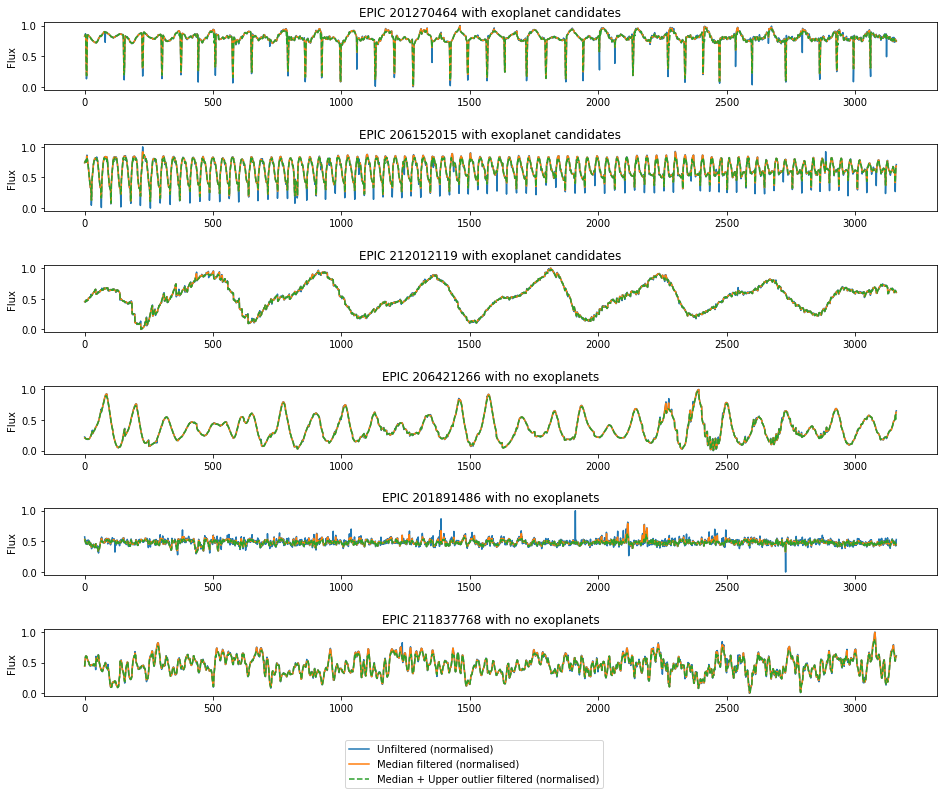

In [13]:
# Choose samples to visualise
samples = [15,120,260,693,2057,3321]
n_samples = len(samples)

# Plot time-series data for the selected samples 
fig = plt.figure(figsize=(16,len(samples)*2))
plt.subplots_adjust(hspace=0.8)

for i in range(n_samples):
    plt.subplot(n_samples,1,i+1)
    plt.plot(flux_norm.iloc[samples[i]].values.tolist())
    plt.plot(flux_norm_med[samples[i]])
    plt.plot(flux_norm_med_up[samples[i]],'--')
    plt.ylabel('Flux')
    title = '{} with exoplanet candidates'.format(labels.iloc[samples[i]].name) if labels.iloc[samples[i]].label == 1 else '{} with no exoplanets'.format(labels.iloc[samples[i]].name)
    plt.title(title)

fig.legend(labels=['Unfiltered (normalised)','Median filtered (normalised)', 'Median + Upper outlier filtered (normalised)'],loc="lower center",borderaxespad=0.1)
plt.subplots_adjust(bottom=0.1)    
plt.show()

### Benchmark model

At this point it would be good to define a benchmark model against which the results of the classification algorithm to be developed will be compared. The performance of this model should be measured using a suitable evaluation metric. In this particular application, we are primarily interested in detecting stars with exoplanet candidates, which as shown above are the minority class in the dataset. For this reason, accuracy would not be a very appropriate metric here (since the model can still have a very high accuracy even if it classifies everything as negative and therefore doesn't find any of the exoplanet stars). In contrast, recall is a much more important metric as it it indicates how many of the total exoplanets have been captured by the model. Another goal of the classifier is to reduce the amount of time that scientists spend to analyse the data collected by Kepler. Therefore, it will also be desirable to minimize the number of false positives that are incorrectly classified as exoplanet candidates by the model. This is measured by the precision metric. It follows that an evaluation metric that combines both precision and recall would be the most ideal for our problem. This can be obtained using a $F_{\beta}$ measure. It is important to remember that our primary goal is the detection of exoplanets and thus recall should have a greater weight than precision. Therefore, it has been decided to use a $F_{\beta}$ score with a high $\beta$ value equal to 2 as the evaluation metric for the benchmark model as well as for the final model that will be developed.

A very basic benchmarking approach would be to use a naive classifier that randomly labels samples as positive or negative. However, due to the imbalance of the dataset this would probably have very poor results. For this reason, a slightly more sophisticated but still quite simple model will have to be developed. For example, it would be interesting to determine what results one would get if he/she was to use the raw flux data provided by NASA to train a simple logistic regression classifier. Being a relatively simple and linear method, this is not expected to have spectacular results, especially when applied on the noisy and high dimensional flux time-series data. Let's see what results we get using this basic model:

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, recall_score, accuracy_score

# split dataset into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(flux.values, labels.label.get_values(), 
                                                    test_size=0.25, random_state=42)

# define logistic regression model
benchmark_model = LogisticRegression(random_state=42)

# fit the model using the training data
benchmark_model = benchmark_model.fit(x_train, y_train)
    
# make prediction on test set
y_logistic = benchmark_model.predict(x_test)

# calculate performance metrics
score = fbeta_score(y_test, y_logistic, beta=2)
recall = recall_score(y_test,y_logistic)   
accuracy = accuracy_score(y_test,y_logistic)

print('Performance of benchmark model on test dataset:')
print('F-score = {:.2f}%'.format(score*100))
print('Recall = {:.2f}%'.format(recall*100))
print('Accuracy = {:.2f}%'.format(accuracy*100))

Performance of benchmark model on test dataset:
F-score = 1.42%
Recall = 1.18%
Accuracy = 90.40%


As expected, the performance of this simple approach is not satisfactory. The logistic regression classifier fails to learn the features (such as the periodic variation of flux) that make a star likely to have an exoplanet. Almost all the samples are classified as negative (the majority class) and only 1.18% of the exoplanet candidates are detected. While one could argue that these results are too poor to be used as a comparator, the approach used to obtain them is actually representative of the very first experiment that a machine learning engineer would conduct: i.e. simple model trained using the raw, unprocessed data. Therefore, it is believed that this is a reasonable benchmark model.   

Through the pre-processing steps described above and the various techniques discussed below, we will try to surpass the results of the logistic regression algorithm and develop a much more robust and useful model.

### Feature extraction

At this stage, the data that we have for each sample is in the form of time-series of 3162 values. The question now is how can we use this kind of information to train a classification algorithm. One option is to just feed these processed time-series to our predictor and hope that it will manage to learn the key features that distinguish the flux of an exoplanet star from that of a non-exoplanet star. Of course, in this case the temporal relationship between the 3162 variables is very important and therefore we would want our predictor to be able to learn the time structures in the data.

Another option, which will be explored here, is to try to extract a much finer set of key features that characterise the time-series. For example, some of the basic characteristics of a time-series are statistical measures such as the mean, maximum, minimum, variance, median, etc. of its values. Ideally, we would want to be able to extract features that are relevant and important for the particular case. This of course requires some domain knowledge. Luckily, there is a python library called Feature Analysis for Time Series (FATS), which was developed with a primary focus on analysing and extracting features from astronomical time-series and in particular light-curve data! The documentation for the package can be found [here](http://isadoranun.github.io/tsfeat/FeaturesDocumentation.html).

The FATS package makes it possible to extract a number of features that are actually used by researchers to analyse and classify light curves. As explained in the documentation, the number of features that can be extracted depends on the variables in the dataset. Our dataset only has one variable - the magnitude of the light-curve - which allows us to extract 22 features, including some common statistics and some more advanced measures. The names of the features are shown below and a description of each of them can be find in the FATS documentation.

In [ ]:
import FATS

# Obtain list of features that can be calculated using only the flux magnitude of a star's light-curve
feature_list = FATS.FeatureSpace(Data=['magnitude'])

feature_list

The code below is used to extract the aforementioned features from the flux time-series dataset using the FATS package. It is applied on both the raw flux data as well as the various pre-processed versions of it that were derived above. This is in order to test how pre-processing affects the calculated features and to determine which mixture of processing steps leads to the best classification results.

In [ ]:
# Select from which dataset to extract features and convert to format required by FATS
x = np.array([flux.iloc[i].get_values()]) #raw flux data
# x = np.array([flux_std.iloc[i].get_values()]) # normalised flux data
# x = np.array([flux_med_up[i]]) # median and upper-outlier filtered data

# Empty array to save extracted features
features = []

# Calculate time-series features for each normalised flux using FATS 
for i in range(0,len(flux)):
    features_=feature_list.calculateFeature(x)
    features.append(features_.result(method='array'))
    
# Save to dataframe
features = pd.DataFrame(features,index=flux.index.values, columns=features_.result(method='features'))

# Save to csv file
save_path = "Data\\flux_features_FATS.csv"
features.to_csv(save_path)

As discussed above, features were extracted from multiple versions of the flux dataset and stored in separate csv file. These can now be loaded, avoiding having to re-run the time-consuming feature extraction process. Let's start with the features from the raw flux data. 

In [16]:
# Load extracted features
try:
    flux_features = pd.read_csv("Data\\flux_features_FATS.csv", index_col=0)
    print('Extracted features loaded: {} samples with {} features.'.format(*flux_features.shape))
except:
    print('Extracted features could not be loaded.')

Extracted features loaded: 4000 samples with 22 features.


Next, let's input the features extracted from the normalised and standardised versions of the flux time-series:

In [17]:
# Load features extracted from median filtered flux data
try:
    flux_norm_features = pd.read_csv("Data\\flux_norm_FATS.csv", index_col=0)
    print('Extracted norm_features loaded: {} samples with {} features.'.format(*flux_norm_features.shape))
except:
    print('Extracted norm_features could not be loaded.')
    
# Load features extracted from Savitzky–Golay filtered flux data 
try:
    flux_std_features = pd.read_csv("Data\\flux_std_FATS.csv", index_col=0)
    print('Extracted std_features loaded: {} samples with {} features.'.format(*flux_std_features.shape))
except:
    print('Extracted std_features could not be loaded.')    

Extracted norm_features loaded: 4000 samples with 22 features.
Extracted std_features loaded: 4000 samples with 22 features.


Finally, we can load the features extracted from the smoothened time-series. In particular, we will load extracted features from the median filtered, median filtered & normalised, Savitzky-Golay filtered and median & upper-outlier filtered time-series:

In [18]:
# Load features extracted from median filtered flux data
try:
    flux_med_features = pd.read_csv("Data\\flux_med_features_FATS.csv", index_col=0)
    print('Extracted med_features loaded: {} samples with {} features.'.format(*flux_med_features.shape))
except:
    print('Extracted med_features could not be loaded.')

# Load features extracted from median filtered normalised flux data
try:
    flux_norm_med_features = pd.read_csv("Data\\flux_norm_med_features_FATS.csv", index_col=0)
    print('Extracted norm_med_features loaded: {} samples with {} features.'.format(*flux_norm_med_features.shape))
except:
    print('Extracted norm_med_features could not be loaded.')

# Load features extracted from Savitzky–Golay filtered flux data 
try:
    flux_sg_features = pd.read_csv("Data\\flux_sg_features_FATS.csv", index_col=0)
    print('Extracted sg_features loaded: {} samples with {} features.'.format(*flux_sg_features.shape))
except:
    print('Extracted sg_features could not be loaded.')
    
# Load features extracted from median and upper-outlier filtered flux data
try:
    flux_med_up_features = pd.read_csv("Data\\flux_med_up_features_FATS.csv", index_col=0)
    print('Extracted med_up_features loaded: {} samples with {} features.'.format(*flux_med_up_features.shape))
except:
    print('Extracted med_up_features could not be loaded.')

Extracted med_features loaded: 4000 samples with 22 features.
Extracted norm_med_features loaded: 4000 samples with 22 features.
Extracted sg_features loaded: 4000 samples with 22 features.
Extracted med_up_features loaded: 4000 samples with 22 features.


Let's see what the feature datasets look like:

In [19]:
flux_med_features.head()

,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201126503,20.043335,1.0,6.0,0.009177,0.161134,0.281052,0.404542,0.570978,0.791195,-3.514435,...,7.108185,0.661290,-0.166667,0.096059,0.050839,14.067642,0.211896,0.150498,1.402287,10.826865
EPIC 201155177,47.752930,1.0,131.0,0.014241,0.184466,0.327884,0.475660,0.630874,0.814041,-11.155273,...,19.278320,0.977546,-0.433333,0.029266,0.004736,38.576660,0.191963,-4.334019,68.535031,30.065129
EPIC 201176672,80.014648,1.0,8.0,0.011709,0.170207,0.287813,0.407513,0.546558,0.770174,1.988281,...,26.572266,0.981025,-0.300000,0.029882,0.003985,53.156250,0.100251,-7.575988,98.888210,67.382097
EPIC 201182911,1085.543213,1.0,2.0,0.013608,0.065607,0.117769,0.169970,0.204334,0.249108,-2171.588867,...,92.334473,0.930108,-0.100000,0.342142,0.135799,190.279785,0.029618,-3.978991,15.937945,461.285017
EPIC 201197348,46.842285,1.0,7.0,0.017722,0.143997,0.249128,0.374509,0.536093,0.748027,-17.596191,...,14.297852,0.933270,-0.300000,0.025076,0.006585,28.386230,0.165966,0.438616,15.269190,26.129237


Once again, it's hard to get any meaningful insight by just looking at the values. One thing that may help is plotting some density histograms to visualise the distribution of values of each feature for exoplanet and non-exoplanet stars. Note that the charts below show the features extracted from the median filtered flux data - similar distributions were observed for the features of the other versions of the dataset. 

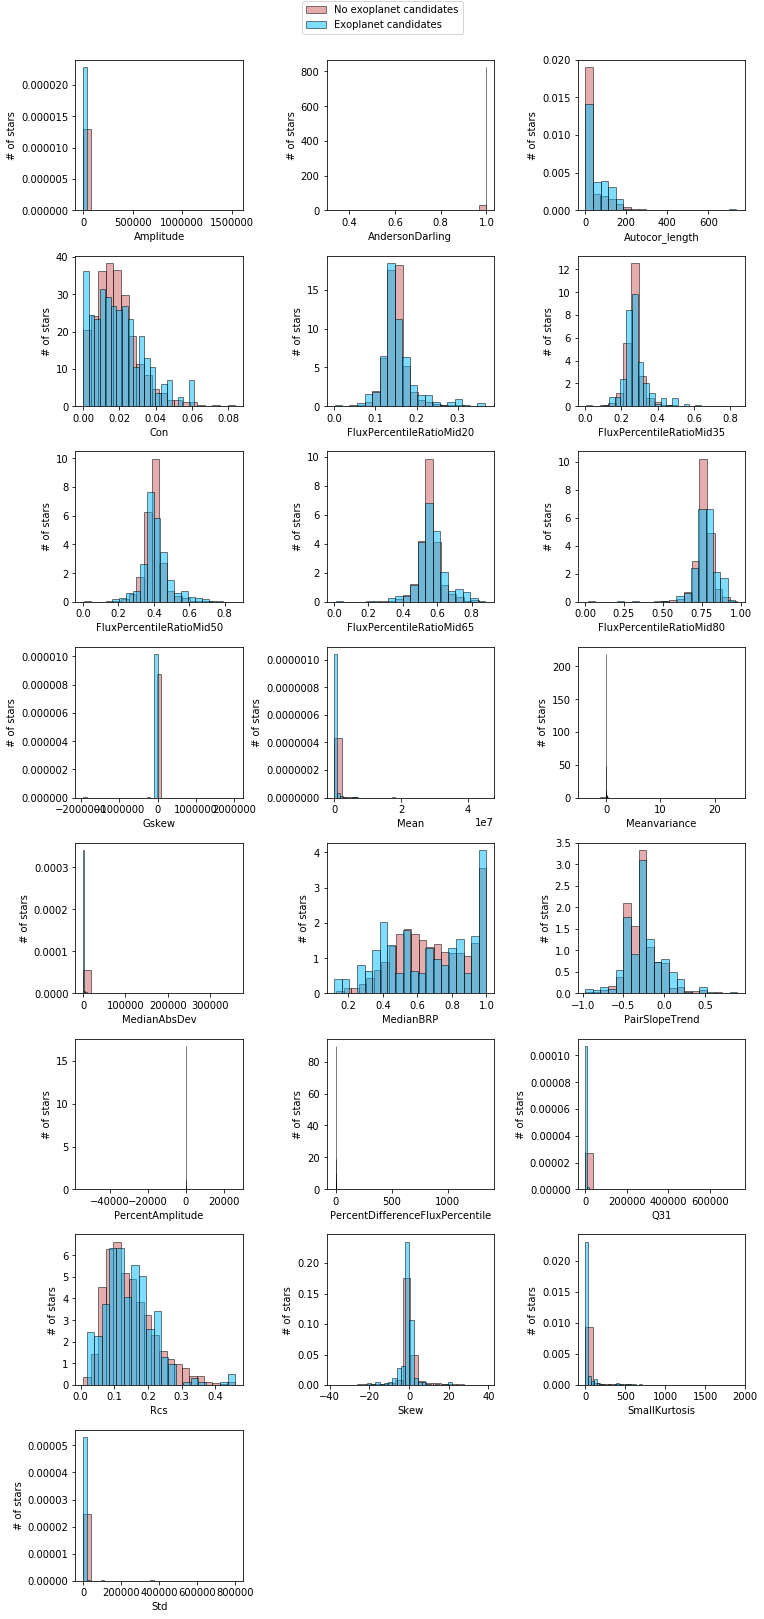

In [20]:
n_exoplanet = labels.label.sum()

fig = plt.figure(figsize=(12,25))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

for i,feature in enumerate(flux_med_features.columns.values):
    ax = fig.add_subplot(8,3,i+1)
    
    pos_feature = flux_med_features[feature].iloc[:n_exoplanet].values
    neg_feature = flux_med_features[feature].iloc[n_exoplanet:].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='No exoplanet candidates')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Exoplanet candidates')

    ax.set_xlabel(feature)
    ax.set_ylabel('# of stars')   

fig.legend(labels=['No exoplanet candidates','Exoplanet candidates'],loc="upper center",borderaxespad=0.1)
plt.subplots_adjust(top=0.97)
plt.show()

By looking at the charts above, one can see a variety of differently shaped distributions for each of the features. It is apparent that for each of these features there are some outliers, which may have a negative effect on the performance of the classifier to be developed. 

Let's try to remove them from the dataset. This will be done using [Tukey's fences](https://en.wikipedia.org/wiki/Outlier#Tukey's_fences) method: an outlier step is defined as 1.5 times the interquartile range, IQR (Q3-Q1) and a point is defined as an outlier if it is beyond an outlier step outside the IQR. This procedure will be used to identify and remove outliers for each of the 22 extracted features. 

In [21]:
features_ = ['Autocor_length', 'Con',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Mean',
        'MedianBRP', 'PairSlopeTrend', 'PercentAmplitude', 'Q31', 'Rcs', 'Skew',
       'SmallKurtosis', 'Std']

In [22]:
features_drop = ['Amplitude', 'AndersonDarling', 'Gskew', 'Meanvariance',
       'PercentAmplitude', 'PercentDifferenceFluxPercentile']

In [23]:
flux_med_features_less = flux_med_features.drop(features_drop,axis=1)

In [24]:
# Create empty array to store outliers' indices
outliers = np.empty(0, dtype=np.int64)

# For each feature find the data points with extreme high or low values
#flux_med_features.keys()
for feature in features_:
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(flux_med_features[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(flux_med_features[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 5*(Q3-Q1)
    
    # Display the outliers
    feature_outliers = np.where(flux_med_features[feature] < Q1 - step)[0]
    feature_outliers = np.concatenate([feature_outliers,np.where(flux_med_features[feature] > Q3 + step)[0]])
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(flux_med_features[~((flux_med_features[feature] >= Q1 - step) & (flux_med_features[feature] <= Q3 + step))])
    outliers = np.concatenate([outliers,feature_outliers])
    
# Remove duplicate indices from outliers list 
outliers = np.unique(outliers)

# Remove the outliers, if any were specified
flux_med_features_reduced = flux_med_features.drop(flux_med_features.index[outliers]).reset_index(drop = True)
labels_reduced = labels.drop(labels.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Autocor_length':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201516974,3.789234e+03,1.0,728.0,0.000000,0.291352,0.567454,0.717654,0.820027,0.897735,5.435938e+02,...,2515.546875,0.164453,-0.166667,0.010141,0.016204,5190.484375,0.444163,0.011889,-1.471552,2553.474748
EPIC 206162305,5.539575e+02,1.0,669.0,0.000000,0.290754,0.433744,0.563320,0.831869,0.945312,-3.635376e+02,...,289.854492,0.123656,-0.233333,0.058343,0.082587,603.325684,0.439274,-0.471008,-1.179531,371.839720
EPIC 211791178,6.839121e+02,1.0,353.0,0.034810,0.200087,0.333691,0.497428,0.624830,0.804790,-2.500234e+02,...,311.746094,0.256167,-0.633333,0.018803,0.025413,623.689453,0.415519,-0.346889,-0.793745,382.772852
EPIC 211797637,1.073559e+03,1.0,735.0,0.000000,0.361274,0.638339,0.790869,0.879278,0.965857,-3.216914e+02,...,755.863281,0.117331,-0.566667,0.026871,0.044674,1669.786133,0.458752,-0.130850,-1.599307,794.579767
EPIC 211408333,1.030352e+02,1.0,494.0,0.033228,0.209427,0.319141,0.408320,0.526886,0.713742,9.247266e+01,...,35.570312,0.503479,-0.366667,0.002664,0.001837,72.050781,0.368100,1.001406,1.222890,54.340447
EPIC 201169367,7.420117e+01,1.0,353.0,0.025633,0.168590,0.315511,0.469066,0.621846,0.811049,7.342188e+01,...,27.474121,0.477546,-0.233333,0.025743,0.015841,59.595337,0.352215,0.960392,0.543497,41.307441
EPIC 211793913,1.358432e+03,1.0,664.0,0.000000,0.290158,0.433285,0.656102,0.749984,0.897742,-1.398359e+02,...,830.593750,0.130930,-0.233333,0.037373,0.063949,1687.898438,0.445757,-0.043546,-1.380576,865.550695
EPIC 211305672,1.120073e+02,1.0,344.0,0.028797,0.219990,0.340848,0.443071,0.565825,0.745856,1.160400e+02,...,39.506348,0.450980,-0.300000,0.016053,0.015025,83.582520,0.342194,0.795644,0.227949,58.633265
EPIC 206115519,2.389781e+03,1.0,499.0,0.005063,0.253545,0.400008,0.576337,0.679262,0.847899,-4.784375e+01,...,1235.218750,0.221695,-0.833333,0.011101,0.017380,2545.621094,0.415377,-0.158326,-1.100516,1416.043221
EPIC 211336478,4.833594e+02,1.0,343.0,0.019304,0.132085,0.294973,0.517623,0.690804,0.811591,5.800391e+02,...,130.800781,0.639469,-0.233333,0.011157,0.006872,362.128906,0.351171,1.041189,1.374012,250.865873


Data points considered outliers for the feature 'Con':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std


Data points considered outliers for the feature 'FluxPercentileRatioMid20':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201488365,868973.250000,1.0,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.000000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 201516974,3789.234375,1.0,728.0,0.000000,0.291352,0.567454,0.717654,0.820027,0.897735,5.435938e+02,...,2515.546875,0.164453,-0.166667,0.010141,0.016204,5190.484375,0.444163,0.011889,-1.471552,2553.474748
EPIC 201683540,549.057617,1.0,34.0,0.001266,0.304692,0.483443,0.624942,0.754482,0.877527,2.386348e+02,...,304.954590,0.179633,0.433333,0.059365,0.074924,639.520996,0.049069,0.232626,-1.310180,347.548270
EPIC 201855371,843.445312,1.0,121.0,0.000000,0.302166,0.482861,0.634698,0.770290,0.904060,2.849766e+02,...,489.421875,0.159393,-0.100000,0.013903,0.019392,1014.541016,0.135666,0.180532,-1.366133,546.289942
EPIC 201912552,950.312500,1.0,304.0,0.001582,0.306774,0.487253,0.622273,0.766863,0.892485,1.289531e+02,...,539.976562,0.194497,-0.233333,0.009920,0.013055,1082.929688,0.264365,0.113613,-1.313271,595.951739
EPIC 201929294,2564.558594,1.0,42.0,0.000000,0.297225,0.492760,0.674072,0.804842,0.908224,-6.619531e+01,...,1646.144531,0.156863,-0.900000,0.040142,0.066130,3286.640625,0.060575,-0.028395,-1.423364,1692.489609
EPIC 206162305,553.957520,1.0,669.0,0.000000,0.290754,0.433744,0.563320,0.831869,0.945312,-3.635376e+02,...,289.854492,0.123656,-0.233333,0.058343,0.082587,603.325684,0.439274,-0.471008,-1.179531,371.839720
EPIC 206535016,4040.234375,1.0,126.0,0.003797,0.319046,0.502594,0.644490,0.771094,0.883869,-1.176578e+03,...,2350.664062,0.187223,0.100000,0.025211,0.031450,4846.058594,0.122157,-0.157833,-1.328468,2585.092430
EPIC 211432103,5458.187500,1.0,16.0,0.000633,0.291223,0.465253,0.627964,0.769743,0.900412,2.241500e+03,...,2950.937500,0.191335,0.100000,0.005459,0.007189,6441.000000,0.035181,0.249460,-1.307065,3501.633385
EPIC 211797637,1073.558594,1.0,735.0,0.000000,0.361274,0.638339,0.790869,0.879278,0.965857,-3.216914e+02,...,755.863281,0.117331,-0.566667,0.026871,0.044674,1669.786133,0.458752,-0.130850,-1.599307,794.579767


Data points considered outliers for the feature 'FluxPercentileRatioMid35':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201488365,868973.250000,1.0,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.000000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 201516974,3789.234375,1.0,728.0,0.000000,0.291352,0.567454,0.717654,0.820027,0.897735,5.435938e+02,...,2515.546875,0.164453,-0.166667,0.010141,0.016204,5190.484375,0.444163,0.011889,-1.471552,2553.474748
EPIC 201683540,549.057617,1.0,34.0,0.001266,0.304692,0.483443,0.624942,0.754482,0.877527,2.386348e+02,...,304.954590,0.179633,0.433333,0.059365,0.074924,639.520996,0.049069,0.232626,-1.310180,347.548270
EPIC 201855371,843.445312,1.0,121.0,0.000000,0.302166,0.482861,0.634698,0.770290,0.904060,2.849766e+02,...,489.421875,0.159393,-0.100000,0.013903,0.019392,1014.541016,0.135666,0.180532,-1.366133,546.289942
EPIC 201912552,950.312500,1.0,304.0,0.001582,0.306774,0.487253,0.622273,0.766863,0.892485,1.289531e+02,...,539.976562,0.194497,-0.233333,0.009920,0.013055,1082.929688,0.264365,0.113613,-1.313271,595.951739
EPIC 201929294,2564.558594,1.0,42.0,0.000000,0.297225,0.492760,0.674072,0.804842,0.908224,-6.619531e+01,...,1646.144531,0.156863,-0.900000,0.040142,0.066130,3286.640625,0.060575,-0.028395,-1.423364,1692.489609
EPIC 206535016,4040.234375,1.0,126.0,0.003797,0.319046,0.502594,0.644490,0.771094,0.883869,-1.176578e+03,...,2350.664062,0.187223,0.100000,0.025211,0.031450,4846.058594,0.122157,-0.157833,-1.328468,2585.092430
EPIC 211797637,1073.558594,1.0,735.0,0.000000,0.361274,0.638339,0.790869,0.879278,0.965857,-3.216914e+02,...,755.863281,0.117331,-0.566667,0.026871,0.044674,1669.786133,0.458752,-0.130850,-1.599307,794.579767
EPIC 211897691,208.256836,1.0,91.0,0.000000,0.365606,0.560403,0.678539,0.788787,0.906868,-5.946875e+01,...,133.149414,0.126186,-0.166667,0.010463,0.015078,263.090332,0.110773,-0.153907,-1.449322,137.097190
EPIC 212009427,790.368164,1.0,13.0,0.001582,0.307395,0.483690,0.640008,0.784808,0.915762,-2.980098e+02,...,435.091797,0.259646,0.433333,0.045163,0.043774,942.084961,0.020691,-0.234569,-1.276060,513.714745


Data points considered outliers for the feature 'FluxPercentileRatioMid50':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201488365,868973.250000,1.0,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.000000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 201516974,3789.234375,1.0,728.0,0.000000,0.291352,0.567454,0.717654,0.820027,0.897735,5.435938e+02,...,2515.546875,0.164453,-0.166667,0.010141,0.016204,5190.484375,0.444163,0.011889,-1.471552,2553.474748
EPIC 201929294,2564.558594,1.0,42.0,0.000000,0.297225,0.492760,0.674072,0.804842,0.908224,-6.619531e+01,...,1646.144531,0.156863,-0.900000,0.040142,0.066130,3286.640625,0.060575,-0.028395,-1.423364,1692.489609
EPIC 211797637,1073.558594,1.0,735.0,0.000000,0.361274,0.638339,0.790869,0.879278,0.965857,-3.216914e+02,...,755.863281,0.117331,-0.566667,0.026871,0.044674,1669.786133,0.458752,-0.130850,-1.599307,794.579767
EPIC 211897691,208.256836,1.0,91.0,0.000000,0.365606,0.560403,0.678539,0.788787,0.906868,-5.946875e+01,...,133.149414,0.126186,-0.166667,0.010463,0.015078,263.090332,0.110773,-0.153907,-1.449322,137.097190
EPIC 211839430,132065.531250,1.0,8.0,0.059177,0.012461,0.024527,0.040576,0.058349,0.360695,-2.476294e+05,...,3491.468750,0.886781,0.033333,0.471938,0.337272,7682.687500,0.029241,-3.085416,8.498952,58314.667001
EPIC 211838305,720.359375,1.0,100.0,0.083861,0.034622,0.061939,0.093943,0.146522,0.507065,-2.919688e+02,...,52.867188,0.778621,-0.233333,0.005428,0.004344,104.312500,0.235804,-0.863929,4.510539,288.026765
EPIC 211914718,94739.406250,1.0,2.0,0.000000,0.284759,0.499385,0.689173,0.813193,0.923136,-7.017550e+04,...,50271.218750,0.168880,-0.300000,0.274502,0.350423,126757.757812,0.007574,-0.393968,-1.344524,64847.987593
EPIC 200004586,917.161655,1.0,4.0,0.002215,0.026718,0.052104,0.075861,0.122112,0.469452,2.523326e+03,...,22.512573,0.997470,-0.233333,25950.947019,3.355685,45.912895,0.045491,25.440165,682.270863,161997.937950
EPIC 201562403,1991.570312,1.0,721.0,0.000000,0.328588,0.534815,0.752443,0.881691,0.930975,-1.335359e+03,...,1144.640625,0.164137,-0.100000,0.015362,0.021727,2898.652344,0.457533,-0.258025,-1.505333,1408.188475


Data points considered outliers for the feature 'FluxPercentileRatioMid65':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201182911,1085.543213,1.0,2.0,0.013608,0.065607,0.117769,0.169970,0.204334,0.249108,-2.171589e+03,...,92.334473,0.930108,-0.100000,0.342142,0.135799,190.279785,0.029618,-3.978991,15.937945,461.285017
EPIC 201407812,16203.921875,1.0,5.0,0.032911,0.095464,0.138550,0.182816,0.237163,0.306082,-3.035266e+04,...,1357.843750,0.937065,-0.966667,0.140522,0.056474,2767.953125,0.084407,-4.006636,16.346043,6529.284420
EPIC 201488365,868973.250000,1.0,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.000000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 211797637,1073.558594,1.0,735.0,0.000000,0.361274,0.638339,0.790869,0.879278,0.965857,-3.216914e+02,...,755.863281,0.117331,-0.566667,0.026871,0.044674,1669.786133,0.458752,-0.130850,-1.599307,794.579767
EPIC 211839430,132065.531250,1.0,8.0,0.059177,0.012461,0.024527,0.040576,0.058349,0.360695,-2.476294e+05,...,3491.468750,0.886781,0.033333,0.471938,0.337272,7682.687500,0.029241,-3.085416,8.498952,58314.667001
EPIC 211479529,475.269165,1.0,4.0,0.021519,0.055917,0.104084,0.157281,0.237252,0.390623,9.851658e+02,...,47.657471,0.903542,0.300000,0.446143,0.167468,101.045776,0.237743,3.639478,14.950621,230.901829
EPIC 211838305,720.359375,1.0,100.0,0.083861,0.034622,0.061939,0.093943,0.146522,0.507065,-2.919688e+02,...,52.867188,0.778621,-0.233333,0.005428,0.004344,104.312500,0.235804,-0.863929,4.510539,288.026765
EPIC 200004586,917.161655,1.0,4.0,0.002215,0.026718,0.052104,0.075861,0.122112,0.469452,2.523326e+03,...,22.512573,0.997470,-0.233333,25950.947019,3.355685,45.912895,0.045491,25.440165,682.270863,161997.937950
EPIC 201562403,1991.570312,1.0,721.0,0.000000,0.328588,0.534815,0.752443,0.881691,0.930975,-1.335359e+03,...,1144.640625,0.164137,-0.100000,0.015362,0.021727,2898.652344,0.457533,-0.258025,-1.505333,1408.188475
EPIC 200004917,274605.494083,1.0,88.0,0.041772,0.001598,0.002490,0.008010,0.013162,0.157890,7.291171e+05,...,149.392232,0.941809,-0.433333,7184.484956,1344.352827,1343.489043,0.212210,4.897259,24.064890,129818.374454


Data points considered outliers for the feature 'FluxPercentileRatioMid80':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201182911,1085.543213,1.0,2.0,0.013608,0.065607,0.117769,0.169970,0.204334,0.249108,-2.171589e+03,...,92.334473,0.930108,-0.100000,0.342142,0.135799,190.279785,0.029618,-3.978991,15.937945,461.285017
EPIC 201407812,16203.921875,1.0,5.0,0.032911,0.095464,0.138550,0.182816,0.237163,0.306082,-3.035266e+04,...,1357.843750,0.937065,-0.966667,0.140522,0.056474,2767.953125,0.084407,-4.006636,16.346043,6529.284420
EPIC 201488365,868973.250000,1.0,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.000000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 211839430,132065.531250,1.0,8.0,0.059177,0.012461,0.024527,0.040576,0.058349,0.360695,-2.476294e+05,...,3491.468750,0.886781,0.033333,0.471938,0.337272,7682.687500,0.029241,-3.085416,8.498952,58314.667001
EPIC 211479529,475.269165,1.0,4.0,0.021519,0.055917,0.104084,0.157281,0.237252,0.390623,9.851658e+02,...,47.657471,0.903542,0.300000,0.446143,0.167468,101.045776,0.237743,3.639478,14.950621,230.901829
EPIC 211838305,720.359375,1.0,100.0,0.083861,0.034622,0.061939,0.093943,0.146522,0.507065,-2.919688e+02,...,52.867188,0.778621,-0.233333,0.005428,0.004344,104.312500,0.235804,-0.863929,4.510539,288.026765
EPIC 200004671,1255.795731,1.0,4.0,0.002215,0.051327,0.096509,0.157222,0.262686,0.498958,3.105509e+03,...,60.368736,0.997470,-0.233333,19818.957335,3.812681,148.140877,0.047387,24.365681,626.109611,173343.308099
EPIC 206308483,43.885681,1.0,78.0,0.051899,0.086776,0.147029,0.221814,0.305609,0.490488,-4.791901e+01,...,5.906189,0.844402,-0.300000,0.115945,0.071323,11.791916,0.197671,-2.111311,7.750225,17.493174
EPIC 200004586,917.161655,1.0,4.0,0.002215,0.026718,0.052104,0.075861,0.122112,0.469452,2.523326e+03,...,22.512573,0.997470,-0.233333,25950.947019,3.355685,45.912895,0.045491,25.440165,682.270863,161997.937950
EPIC 201890494,3784.007812,1.0,3.0,0.012025,0.078874,0.147502,0.226743,0.364293,0.492112,-1.281119e+04,...,463.367188,0.939595,0.100000,0.110544,0.022034,1011.218750,0.032724,-5.360127,32.798229,2694.165039


Data points considered outliers for the feature 'Mean':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201270464,12794.75000,1.000000,4.0,0.019937,0.088985,0.176405,0.279807,0.416045,0.595713,-1.748950e+04,...,1528.75000,0.835547,-0.433333,0.010581,0.003759,3130.875000,0.035544,-3.212278,13.009473,4982.976380
EPIC 201488365,868973.25000,1.000000,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.00000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 201534540,183812.00000,1.000000,21.0,0.024367,0.236413,0.422092,0.593938,0.737557,0.869714,-2.426575e+05,...,56897.00000,0.390259,-0.233333,0.052201,0.044149,182532.000000,0.033014,-0.775702,-0.604529,108853.031404
EPIC 201705526,571.31250,1.000000,5.0,0.009177,0.168116,0.279053,0.420933,0.569229,0.760017,-7.738375e+03,...,184.31250,0.986085,-0.166667,0.060227,0.000499,367.750000,0.028918,-10.609663,117.545195,8209.266520
EPIC 201862715,6679.65625,1.000000,36.0,0.013608,0.146437,0.261164,0.362846,0.511968,0.759518,-9.410875e+03,...,1496.59375,0.728020,0.433333,0.019049,0.008111,2991.671875,0.127244,-2.240608,8.601718,3120.128776
EPIC 206119924,15560.31250,1.000000,235.0,0.031013,0.191323,0.353204,0.546375,0.743960,0.903997,-1.657669e+04,...,4998.90625,0.254269,-0.700000,0.025498,0.029572,15792.234375,0.253399,-0.777667,-0.803859,9803.203547
EPIC 206144956,3274.71875,1.000000,170.0,0.061392,0.115978,0.220506,0.333929,0.478264,0.736955,9.737500e+02,...,982.34375,0.437698,-0.100000,0.004734,0.005673,1876.703125,0.237981,0.482602,0.061961,1572.377374
EPIC 206247743,291.31250,1.000000,8.0,0.031962,0.126384,0.225445,0.337397,0.476671,0.689365,-1.761875e+02,...,73.90625,0.757116,-0.233333,0.000858,0.000544,150.296875,0.070656,-0.529774,2.779564,138.719118
EPIC 211328748,533.62500,1.000000,3.0,0.014873,0.146939,0.269225,0.406219,0.552038,0.740300,-2.150000e+02,...,181.12500,0.523403,-0.500000,0.000742,0.000685,361.843750,0.092135,-0.334495,0.240188,267.406539
EPIC 211333233,21121.37500,1.000000,74.0,0.040823,0.171769,0.280423,0.437982,0.571642,0.742795,1.772500e+03,...,8132.12500,0.401645,0.100000,0.012516,0.015027,16705.750000,0.253827,0.176530,-0.429136,11225.823121


Data points considered outliers for the feature 'MedianBRP':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std


Data points considered outliers for the feature 'PairSlopeTrend':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std


Data points considered outliers for the feature 'PercentAmplitude':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201182911,1085.543213,1.000000,2.0,0.013608,0.065607,0.117769,0.169970,0.204334,0.249108,-2.171589e+03,...,92.334473,0.930108,-0.100000,0.342142,0.135799,190.279785,0.029618,-3.978991,15.937945,461.285017
EPIC 201231940,8.456131,1.000000,3.0,0.006013,0.137007,0.252407,0.376264,0.554028,0.777712,2.213562e+00,...,2.634293,0.989564,-0.300000,0.258158,0.029647,5.298439,0.154950,-7.936902,126.185864,6.608031
EPIC 201270176,17075.765625,1.000000,3.0,0.001899,0.141838,0.239356,0.360216,0.511991,0.742629,-8.243500e+03,...,4735.515625,0.999051,-0.300000,1.042851,0.064110,9552.968750,0.039452,19.637089,542.720743,15676.226230
EPIC 201488365,868973.250000,1.000000,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.000000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 201563164,18.185791,1.000000,2.0,0.000000,0.147896,0.252717,0.386204,0.536951,0.747573,-4.116699e+00,...,5.946716,0.999367,-0.566667,0.294199,0.017178,11.923218,0.031324,21.656486,706.543512,16.217490
EPIC 201928106,28.785400,1.000000,3.0,0.006013,0.145338,0.263879,0.402605,0.564496,0.779381,1.266797e+01,...,9.317261,0.998419,-0.166667,0.218311,0.015940,18.662720,0.098120,-16.022001,415.200060,24.679738
EPIC 206032309,58.478516,1.000000,3.0,0.009494,0.085211,0.152600,0.237230,0.355333,0.717585,7.088037e+01,...,11.486816,0.991461,0.100000,0.284358,0.024077,23.711426,0.158731,14.064566,364.599851,42.665841
EPIC 211413463,125.754761,1.000000,3.0,0.014873,0.188271,0.330515,0.479932,0.632498,0.825589,-4.077296e+02,...,9.186462,0.965844,-0.433333,0.401933,0.025028,18.792114,0.028567,-6.070212,38.279514,73.402570
EPIC 211754962,190.138672,1.000000,2.0,0.001582,0.075389,0.136441,0.212299,0.322656,0.714570,-1.073555e+02,...,33.539062,0.996205,-0.300000,0.172690,0.008762,67.207031,0.083807,17.358149,406.676969,228.849639
EPIC 211972086,72.893066,1.000000,3.0,0.007278,0.236519,0.419373,0.586903,0.737255,0.869562,-2.370243e+02,...,34.681030,0.974383,-0.500000,0.260533,0.038431,69.546997,0.044171,-4.877775,38.385803,81.916660


Data points considered outliers for the feature 'Q31':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201257461,1046.921875,1.000000,12.0,0.020886,0.132677,0.221792,0.327065,0.477525,0.755349,8.566875e+02,...,279.531250,0.907653,-0.233333,0.022005,0.005271,560.257812,0.259330,2.680813,24.054930,560.024069
EPIC 201270176,17075.765625,1.000000,3.0,0.001899,0.141838,0.239356,0.360216,0.511991,0.742629,-8.243500e+03,...,4735.515625,0.999051,-0.300000,1.042851,0.064110,9552.968750,0.039452,19.637089,542.720743,15676.226230
EPIC 201270464,12794.750000,1.000000,4.0,0.019937,0.088985,0.176405,0.279807,0.416045,0.595713,-1.748950e+04,...,1528.750000,0.835547,-0.433333,0.010581,0.003759,3130.875000,0.035544,-3.212278,13.009473,4982.976380
EPIC 201407812,16203.921875,1.000000,5.0,0.032911,0.095464,0.138550,0.182816,0.237163,0.306082,-3.035266e+04,...,1357.843750,0.937065,-0.966667,0.140522,0.056474,2767.953125,0.084407,-4.006636,16.346043,6529.284420
EPIC 201441872,1924.945312,1.000000,80.0,0.027215,0.131622,0.246688,0.380842,0.567787,0.815612,5.455781e+02,...,633.171875,0.457622,-0.166667,0.013041,0.014739,1261.343750,0.158785,0.403027,-0.189348,992.477594
EPIC 201488365,868973.250000,1.000000,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.000000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 201505350,606.351562,1.000000,135.0,0.018987,0.201512,0.374587,0.493701,0.643234,0.846092,1.039766e+02,...,270.234375,0.359266,-0.500000,0.012245,0.010236,541.650391,0.197889,0.049985,-0.673540,345.916360
EPIC 201516974,3789.234375,1.000000,728.0,0.000000,0.291352,0.567454,0.717654,0.820027,0.897735,5.435938e+02,...,2515.546875,0.164453,-0.166667,0.010141,0.016204,5190.484375,0.444163,0.011889,-1.471552,2553.474748
EPIC 201534540,183812.000000,1.000000,21.0,0.024367,0.236413,0.422092,0.593938,0.737557,0.869714,-2.426575e+05,...,56897.000000,0.390259,-0.233333,0.052201,0.044149,182532.000000,0.033014,-0.775702,-0.604529,108853.031404
EPIC 201569483,4017.468750,1.000000,25.0,0.005380,0.160489,0.282471,0.424141,0.589686,0.789948,1.908281e+02,...,1469.328125,0.845667,0.433333,0.097669,0.026240,2938.070312,0.102983,-3.179363,22.884012,2756.745791


Data points considered outliers for the feature 'Rcs':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std


Data points considered outliers for the feature 'Skew':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201176672,80.014648,1.0,8.0,0.011709,0.170207,0.287813,0.407513,0.546558,0.770174,1.988281,...,26.572266,0.981025,-0.300000,0.029882,0.003985,53.156250,0.100251,-7.575988,98.888210,67.382097
EPIC 201208431,62.628906,1.0,3.0,0.000316,0.127419,0.235796,0.377943,0.533530,0.772283,5.453125,...,19.915039,0.999051,-0.366667,0.073780,0.004521,40.184570,0.089644,20.845796,582.764336,61.907122
EPIC 201231940,8.456131,1.0,3.0,0.006013,0.137007,0.252407,0.376264,0.554028,0.777712,2.213562,...,2.634293,0.989564,-0.300000,0.258158,0.029647,5.298439,0.154950,-7.936902,126.185864,6.608031
EPIC 201238110,69.665527,1.0,12.0,0.005696,0.163953,0.308119,0.444052,0.616583,0.816951,-4.913086,...,25.799316,0.992726,-0.233333,0.118441,0.012392,52.666504,0.136605,8.846066,165.851470,55.437776
EPIC 201239401,119.265625,1.0,104.0,0.025633,0.161202,0.275644,0.374672,0.494464,0.692079,-45.542969,...,32.992676,0.969639,-0.033333,0.091153,0.013092,66.387695,0.189598,5.820277,109.999630,66.948909
EPIC 201270176,17075.765625,1.0,3.0,0.001899,0.141838,0.239356,0.360216,0.511991,0.742629,-8243.500000,...,4735.515625,0.999051,-0.300000,1.042851,0.064110,9552.968750,0.039452,19.637089,542.720743,15676.226230
EPIC 201291843,42.789062,1.0,3.0,0.000316,0.165735,0.284815,0.417838,0.573916,0.766885,-1.082031,...,15.128906,0.999051,-0.300000,0.027769,0.001586,30.098633,0.074145,-21.327916,601.003858,44.589402
EPIC 201338508,105.459961,1.0,37.0,0.003797,0.138036,0.257281,0.376721,0.558671,0.796420,-3.525391,...,33.455078,0.995572,-0.366667,0.057517,0.007383,67.557617,0.125732,7.675790,153.307677,68.695415
EPIC 201367065,381.875000,1.0,80.0,0.007911,0.188207,0.313426,0.428274,0.551788,0.724272,-218.687500,...,139.906250,0.985136,-0.566667,0.013790,0.001878,282.335938,0.126555,-6.473425,107.281055,252.537461
EPIC 201445392,37.052734,1.0,13.0,0.017405,0.137839,0.252204,0.387246,0.534929,0.769642,-33.033203,...,10.664062,0.980076,-0.300000,0.017829,0.002093,21.369141,0.100847,-7.345884,121.749811,24.697080


Data points considered outliers for the feature 'SmallKurtosis':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201176672,80.014648,1.0,8.0,0.011709,0.170207,0.287813,0.407513,0.546558,0.770174,1.988281,...,26.572266,0.981025,-0.300000,0.029882,0.003985,53.156250,0.100251,-7.575988,98.888210,67.382097
EPIC 201208431,62.628906,1.0,3.0,0.000316,0.127419,0.235796,0.377943,0.533530,0.772283,5.453125,...,19.915039,0.999051,-0.366667,0.073780,0.004521,40.184570,0.089644,20.845796,582.764336,61.907122
EPIC 201231940,8.456131,1.0,3.0,0.006013,0.137007,0.252407,0.376264,0.554028,0.777712,2.213562,...,2.634293,0.989564,-0.300000,0.258158,0.029647,5.298439,0.154950,-7.936902,126.185864,6.608031
EPIC 201238110,69.665527,1.0,12.0,0.005696,0.163953,0.308119,0.444052,0.616583,0.816951,-4.913086,...,25.799316,0.992726,-0.233333,0.118441,0.012392,52.666504,0.136605,8.846066,165.851470,55.437776
EPIC 201239401,119.265625,1.0,104.0,0.025633,0.161202,0.275644,0.374672,0.494464,0.692079,-45.542969,...,32.992676,0.969639,-0.033333,0.091153,0.013092,66.387695,0.189598,5.820277,109.999630,66.948909
EPIC 201270176,17075.765625,1.0,3.0,0.001899,0.141838,0.239356,0.360216,0.511991,0.742629,-8243.500000,...,4735.515625,0.999051,-0.300000,1.042851,0.064110,9552.968750,0.039452,19.637089,542.720743,15676.226230
EPIC 201291843,42.789062,1.0,3.0,0.000316,0.165735,0.284815,0.417838,0.573916,0.766885,-1.082031,...,15.128906,0.999051,-0.300000,0.027769,0.001586,30.098633,0.074145,-21.327916,601.003858,44.589402
EPIC 201338508,105.459961,1.0,37.0,0.003797,0.138036,0.257281,0.376721,0.558671,0.796420,-3.525391,...,33.455078,0.995572,-0.366667,0.057517,0.007383,67.557617,0.125732,7.675790,153.307677,68.695415
EPIC 201367065,381.875000,1.0,80.0,0.007911,0.188207,0.313426,0.428274,0.551788,0.724272,-218.687500,...,139.906250,0.985136,-0.566667,0.013790,0.001878,282.335938,0.126555,-6.473425,107.281055,252.537461
EPIC 201393098,76.546875,1.0,3.0,0.001266,0.134283,0.249142,0.396180,0.537973,0.746131,48.421875,...,22.378906,0.997786,-0.033333,0.030069,0.001604,47.755859,0.078452,4.979047,388.702000,97.330767


Data points considered outliers for the feature 'Std':


,Amplitude,AndersonDarling,Autocor_length,Con,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,Gskew,...,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,PercentDifferenceFluxPercentile,Q31,Rcs,Skew,SmallKurtosis,Std
EPIC 201182911,1085.543213,1.000000,2.0,0.013608,0.065607,0.117769,0.169970,0.204334,0.249108,-2.171589e+03,...,92.334473,0.930108,-0.100000,0.342142,0.135799,190.279785,0.029618,-3.978991,15.937945,461.285017
EPIC 201257461,1046.921875,1.000000,12.0,0.020886,0.132677,0.221792,0.327065,0.477525,0.755349,8.566875e+02,...,279.531250,0.907653,-0.233333,0.022005,0.005271,560.257812,0.259330,2.680813,24.054930,560.024069
EPIC 201270176,17075.765625,1.000000,3.0,0.001899,0.141838,0.239356,0.360216,0.511991,0.742629,-8.243500e+03,...,4735.515625,0.999051,-0.300000,1.042851,0.064110,9552.968750,0.039452,19.637089,542.720743,15676.226230
EPIC 201270464,12794.750000,1.000000,4.0,0.019937,0.088985,0.176405,0.279807,0.416045,0.595713,-1.748950e+04,...,1528.750000,0.835547,-0.433333,0.010581,0.003759,3130.875000,0.035544,-3.212278,13.009473,4982.976380
EPIC 201407812,16203.921875,1.000000,5.0,0.032911,0.095464,0.138550,0.182816,0.237163,0.306082,-3.035266e+04,...,1357.843750,0.937065,-0.966667,0.140522,0.056474,2767.953125,0.084407,-4.006636,16.346043,6529.284420
EPIC 201441872,1924.945312,1.000000,80.0,0.027215,0.131622,0.246688,0.380842,0.567787,0.815612,5.455781e+02,...,633.171875,0.457622,-0.166667,0.013041,0.014739,1261.343750,0.158785,0.403027,-0.189348,992.477594
EPIC 201488365,868973.250000,1.000000,6.0,0.038608,0.002056,0.003842,0.005981,0.008568,0.015467,-1.949995e+06,...,2529.000000,0.924099,-0.566667,0.355668,0.143731,5163.500000,0.018429,-4.183511,16.830261,373542.711593
EPIC 201516974,3789.234375,1.000000,728.0,0.000000,0.291352,0.567454,0.717654,0.820027,0.897735,5.435938e+02,...,2515.546875,0.164453,-0.166667,0.010141,0.016204,5190.484375,0.444163,0.011889,-1.471552,2553.474748
EPIC 201534540,183812.000000,1.000000,21.0,0.024367,0.236413,0.422092,0.593938,0.737557,0.869714,-2.426575e+05,...,56897.000000,0.390259,-0.233333,0.052201,0.044149,182532.000000,0.033014,-0.775702,-0.604529,108853.031404
EPIC 201569483,4017.468750,1.000000,25.0,0.005380,0.160489,0.282471,0.424141,0.589686,0.789948,1.908281e+02,...,1469.328125,0.845667,0.433333,0.097669,0.026240,2938.070312,0.102983,-3.179363,22.884012,2756.745791


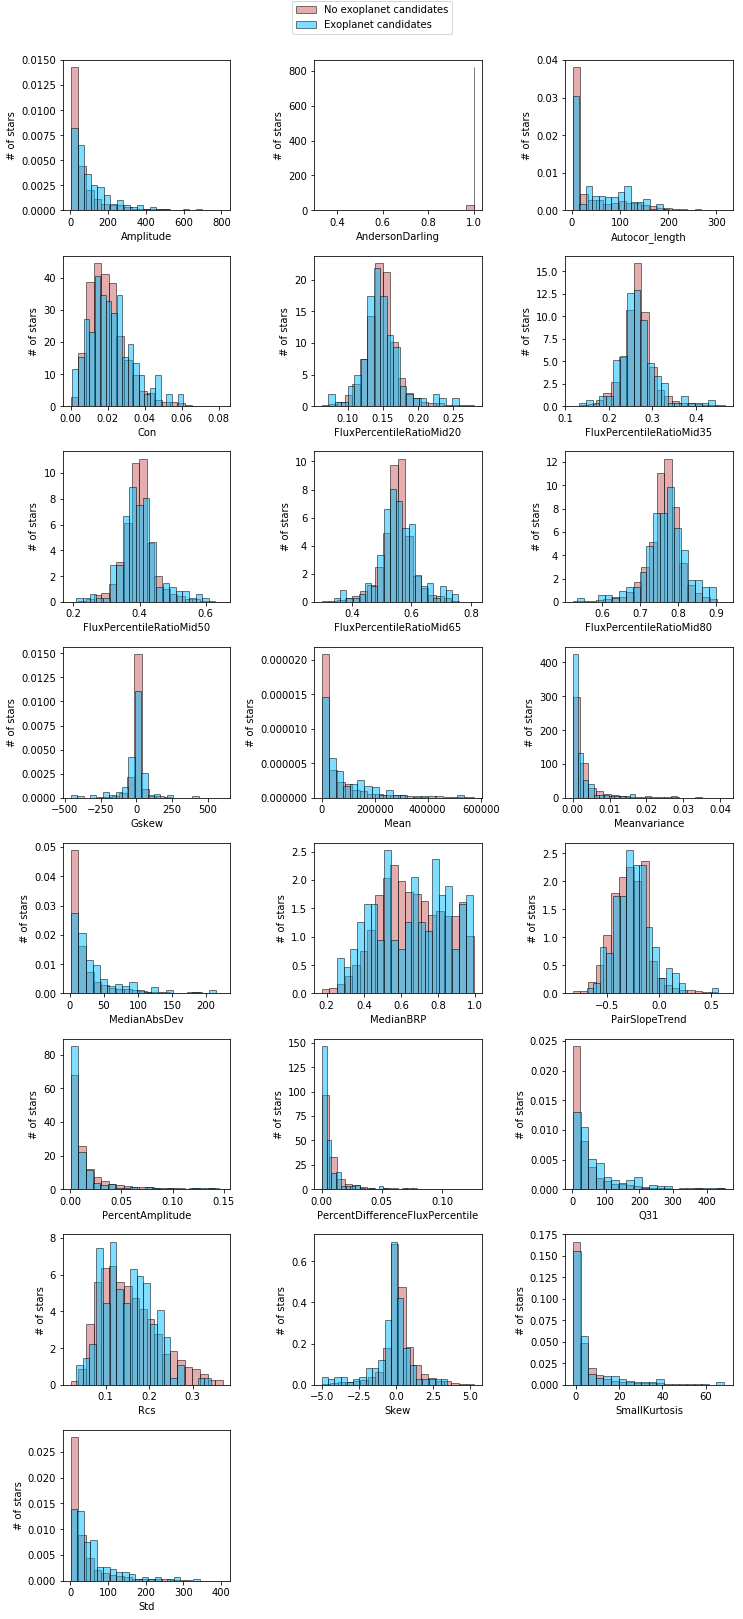

In [25]:
n_exoplanet = labels_reduced.label.sum()

fig = plt.figure(figsize=(12,25))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

for i,feature in enumerate(flux_med_features_reduced.columns.values):
    ax = fig.add_subplot(8,3,i+1)
    
    pos_feature = flux_med_features_reduced[feature].iloc[:n_exoplanet].values
    neg_feature = flux_med_features_reduced[feature].iloc[n_exoplanet:].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='No exoplanet candidates')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Exoplanet candidates')

    ax.set_xlabel(feature)
    ax.set_ylabel('# of stars')   

fig.legend(labels=['No exoplanet candidates','Exoplanet candidates'],loc="upper center",borderaxespad=0.1)
plt.subplots_adjust(top=0.97)
plt.show()

In [26]:
flux_med_features_reduced = flux_med_features_reduced.drop(['AndersonDarling'],axis=1)

It is still hard to identify any potential trends or differencies between the positive and negative samples' features. A better understanding of the domain and data would clearly help. However, from a first sight at the distributions, it looks like `Autocor_length`, `Con`, `Gskew`, `MedianBRP`, `SmallKurtosis` and `Std` may be features that will be more useful for the classification. For this reason, these features will be extracted and stored in a separate dataframe, to be tested when training the classifier, in addition to the full set of features.

In [27]:
chosen_features = ['Autocor_length','Con','Gskew','MedianBRP','SmallKurtosis','Std']
flux_med_features_chosen = flux_med_features[chosen_features]

#### PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA()

# PCA on flux_features
pca_features = pca.fit_transform(flux_features)

# PCA on flux_med_features
pca_med_features = pca.fit_transform(flux_med_features)

# PCA on flux_sg_features
pca_sg_features = pca.fit_transform(flux_sg_features)

# PCA on flux_med_features_chosen
pca_med_features_chosen = pca.fit_transform(flux_med_features_chosen)

# PCA on flux_med_up_features
pca_flux_med_up_features = pca.fit_transform(flux_med_up_features)

#### Normalisation/Standardisation of extracted sets of features

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
flux_features_norm = scaler.fit_transform(flux_features.values)

flux_med_features_norm = scaler.fit_transform(flux_med_features.values)
pca_med_features_norm = scaler.fit_transform(pca_med_features)
flux_med_features_chosen_norm = scaler.fit_transform(flux_med_features_chosen.values)

flux_med_up_features_norm = scaler.fit_transform(flux_med_up_features.values)

flux_sg_features_norm = scaler.fit_transform(flux_sg_features.values)
pca_sg_features_norm = scaler.fit_transform(pca_sg_features)

flux_norm_features_norm = scaler.fit_transform(flux_norm_features.values)
flux_norm_med_features_norm = scaler.fit_transform(flux_norm_med_features.values)

flux_med_features_reduced_norm = scaler.fit_transform(flux_med_features_reduced.values)
flux_med_features_less_norm = scaler.fit_transform(flux_med_features_less.values)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
flux_features_std = scaler.fit_transform(flux_features.values)
flux_med_features_std = scaler.fit_transform(flux_med_features.values)
flux_sg_features_std = scaler.fit_transform(flux_sg_features.values)
flux_norm_features_std = scaler.fit_transform(flux_norm_features.values)
flux_norm_med_features_std = scaler.fit_transform(flux_norm_med_features.values)

flux_med_features_reduced_std = scaler.fit_transform(flux_med_features_reduced.values)
flux_med_features_less_std = scaler.fit_transform(flux_med_features_less.values)

### Fourier transform

In [31]:
# Define function that applies the Discrete Fourier Transformation (DFT) on an input array x, using  
# scipy's fft function. The output of the function is the magnitude of the Fourier Transform.

from scipy.fftpack import fft

def fourier_magnitude(x):
    x_fft = abs(fft(x))
    return x_fft

FFT will be applied to the standardised flux data. Taking the fourier transform of another time-series whose mean is not 0 (such as the normalised flux data, `flux norm`) has resulted in a big spike at 0 Hz frequency, which is of course unwanted. 

In [32]:
# Apply fourier_magnitude on the standardised flux data
flux_fft = flux_std.apply(lambda row : fourier_magnitude(row), axis = 1)

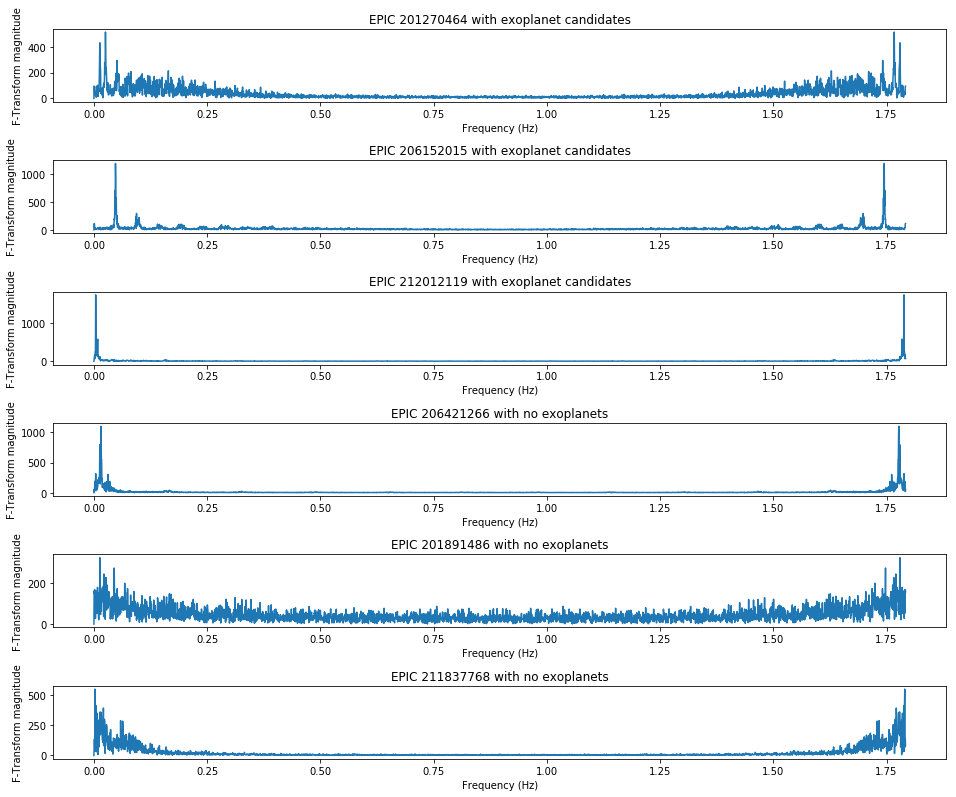

In [33]:
# Choose samples to visualise
samples = [15,120,260,693,2057,3321]
n_samples = len(samples)

# Calculate frequencies/x-axis values given that the time interval between samples is 29.4 minutes
freq = np.arange(len(flux_fft.values.tolist()[0]))*(1/(29.4*60))

# Plot time-series data for the selected samples 
fig = plt.figure(figsize=(16,len(samples)*2))
plt.subplots_adjust(hspace=0.8)

for i in range(n_samples):
    plt.subplot(n_samples,1,i+1)
    plt.plot(freq,flux_fft[samples[i]])
    plt.ylabel('F-Transform magnitude')
    plt.xlabel('Frequency (Hz)')
    title = '{} with exoplanet candidates'.format(labels.iloc[samples[i]].name) if labels.iloc[samples[i]].label == 1 else '{} with no exoplanets'.format(labels.iloc[samples[i]].name)
    plt.title(title)

plt.subplots_adjust(top=0.97)
plt.show()

The first thing that is easily observed through inspection of the plotted series in the frequency domain is that they are symmetric. We can therefore simply keep one half of the data without loosing any useful information. Note that the first term corresponding to 0 Hz (DC term) is also removed, since it is equal to the mean which should be zero for all the samples (as we have standardized our series) and is therefore insignificant.

In [34]:
# Convert flux_fft to pandas Series
flux_fft = flux_fft.apply(pd.Series)
len_flux_fft = len(flux_fft.columns)

# Truncate flux_fft
flux_fft_half = flux_fft[flux_fft.columns[1:int(len_flux_fft/2+3)]]

In [35]:
p_highlow = 0.9 # percentage of high or low frequencies to be kept

flux_fft_half_high = flux_fft_half[flux_fft_half.columns[int(len_flux_fft/2*(1-p_highlow)):]]
flux_fft_half_low = flux_fft_half[flux_fft_half.columns[0:int(len_flux_fft/2*p_highlow+1)]]

In [36]:
scaler = MinMaxScaler()
flux_fft_half_norm = scaler.fit_transform(flux_fft_half.values)
flux_fft_half_high_norm = scaler.fit_transform(flux_fft_half_high.values)
flux_fft_half_low_norm = scaler.fit_transform(flux_fft_half_low.values)

---

### Classification using extracted features

In [37]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

##### Spot-checking various algorithms

In [38]:
# Algorithm spot-check
from sklearn.metrics import fbeta_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def predictor(classifier, X, y, test_size=0.25, beta=2, oversample=0):
    
    # split dataset into training and test subsets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # resample training dataset using SMOTE
    if oversample>0:
        sm = SMOTE(sampling_strategy=oversample,random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
        
    # fit the model using the training data
    model = classifier.fit(x_train, y_train)
    
    # make prediction on first 500 samples of training set
    y_pred_train = model.predict(x_train[:500])
    
    # make prediction on test set
    y_pred_test = model.predict(x_test)
    
    # calculate f-score, recall and accuracy on training and test set
    score_train = fbeta_score(y_train[:500], y_pred_train, beta)
    score_test = fbeta_score(y_test, y_pred_test, beta)
    
    recall_train = recall_score(y_train[:500],y_pred_train)
    recall_test = recall_score(y_test,y_pred_test)
    
    accuracy_train = accuracy_score(y_train[:500],y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    
    fscore = [score_train,score_test]
    recall = [recall_train,recall_test]
    accuracy = [accuracy_train,accuracy_test]
        
    return fscore, recall, accuracy, y_pred_test, y_pred_train

In [39]:
# Dictionary containing all possible datasets to be tested for the classification
x_options = dict()

x_options['flux_features'] = flux_features.values
x_options['flux_features_norm'] = flux_features_norm
x_options['flux_med_features'] = flux_med_features.values
x_options['flux_med_features_norm'] = flux_med_features_norm
x_options['flux_med_features_std'] = flux_med_features_std
x_options['chosen flux_med_features'] = flux_med_features_chosen.values
x_options['chosen flux_med_features_norm'] = flux_med_features_chosen_norm
x_options['flux_sg_features'] = flux_sg_features.values
x_options['flux_sg_features_norm'] = flux_sg_features_norm
x_options['flux_sg_features_std'] = flux_sg_features_std
x_options['flux_norm_features'] = flux_norm_features.values
x_options['flux_norm_features_norm'] = flux_norm_features_norm
x_options['flux_norm_features_std'] = flux_norm_features_std
x_options['flux_norm_med_features'] = flux_norm_med_features.values
x_options['flux_norm_med_features_norm'] = flux_norm_med_features_norm
x_options['flux_norm_med_features_std'] = flux_norm_med_features_std
x_options['flux_med_up_features'] = flux_med_up_features.values
x_options['flux_med_up_features_norm'] = flux_med_up_features_norm

x_options['pca_features'] = pca_features
x_options['pca_med_features'] = pca_med_features
x_options['chosen pca_med_features'] = pca_med_features_chosen
x_options['pca_med_features_norm'] = pca_med_features_norm
x_options['pca_sg_features'] = pca_sg_features_norm

x_options['flux_fft'] = flux_fft_half.values
x_options['flux_fft_low'] = flux_fft_half_low.values
x_options['flux_fft_high'] = flux_fft_half_high.values
x_options['flux_fft_norm'] = flux_fft_half_norm
x_options['flux_fft_low_norm'] = flux_fft_half_low_norm
x_options['flux_fft_high_norm'] = flux_fft_half_high_norm

x_options['flux_med_features_reduced'] = flux_med_features_reduced.values
x_options['flux_med_features_reduced_norm'] = flux_med_features_reduced_norm
x_options['flux_med_features_reduced_std'] = flux_med_features_reduced_std

x_options['flux_med_features_less'] = flux_med_features_less.values
x_options['flux_med_features_less_norm'] = flux_med_features_less_norm
x_options['flux_med_features_less_std'] = flux_med_features_less_std


In [52]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Dictionary containing all classification models to be tested
models = dict()

models['Logistic'] = LogisticRegression(class_weight='balanced', random_state=42)
models['SGD'] = SGDClassifier(class_weight='balanced', random_state=42)

models['Decision Tree'] = DecisionTreeClassifier(class_weight='balanced', random_state=42)

models['Linear SVM'] = SVC(kernel='linear', class_weight='balanced', max_iter=10000, random_state=42)
models['Cubic SVM'] = SVC(kernel='poly', class_weight='balanced', max_iter=10000, random_state=42)
for c in np.arange(0.1, 1.1, 0.1):
    models['RBF SVM (C = '+str(c)+')'] = SVC(C=c, class_weight='balanced', max_iter=10000, random_state=42)

models['Naive Bayes'] = GaussianNB()

models['AdaBoost'] = AdaBoostClassifier(n_estimators=50 ,random_state=42)
models['Gradient Boosting'] = GradientBoostingClassifier(n_estimators=50 ,random_state=42)
models['XGBoost'] = XGBClassifier(n_estimators = 50, max_depth=3, random_state=42)
models['LightGBM'] = LGBMClassifier(n_estimators=50, max_depth=3, random_state=42)
models['Bagging'] = BaggingClassifier(n_estimators=50 ,random_state=42)
models['Random Forest'] = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42)

In [51]:
x = x_options['flux_med_features_norm']
y = labels.label.get_values()
#y = labels_reduced.label.get_values()

scores = []
recalls = []
accuracies = []

for model in models:
    
    score, recall, accuracy, y_pred_test, y_pred_train = predictor(models[model], x, y, oversample=1)
    
    scores.append(score[1])
    recalls.append(recall[1])
    accuracies.append(recall[1])
    
    print(model)
    print('\nTraining set')
    print('F-score = {:.2f}%'.format(score[0]*100))
    print('Recall = {:.2f}%'.format(recall[0]*100))
    print('Accuracy = {:.2f}%'.format(accuracy[0]*100))
    print('\nTest set')
    print('F-score = {:.2f}%'.format(score[1]*100))
    print('Recall = {:.2f}%'.format(recall[1]*100))
    print('Accuracy = {:.2f}%'.format(accuracy[1]*100))
    print('----------------------------------------------')

Logistic

Training set
F-score = 33.06%
Recall = 66.67%
Accuracy = 58.60%

Test set
F-score = 34.61%
Recall = 65.88%
Accuracy = 55.80%
----------------------------------------------
SGD

Training set
F-score = 9.20%
Recall = 8.33%
Accuracy = 90.20%

Test set
F-score = 2.71%
Recall = 2.35%
Accuracy = 89.00%
----------------------------------------------
Decision Tree

Training set
F-score = 100.00%
Recall = 100.00%
Accuracy = 100.00%

Test set
F-score = 25.54%
Recall = 30.59%
Accuracy = 79.80%
----------------------------------------------
Linear SVM

Training set
F-score = 34.48%
Recall = 66.67%
Accuracy = 61.60%

Test set
F-score = 32.91%
Recall = 61.18%
Accuracy = 56.90%
----------------------------------------------
Cubic SVM

Training set
F-score = 9.20%
Recall = 8.33%
Accuracy = 90.20%

Test set
F-score = 4.12%
Recall = 3.53%
Accuracy = 89.70%
----------------------------------------------
RBF SVM (C = 0.1)

Training set
F-score = 28.63%
Recall = 36.11%
Accuracy = 81.40%

Test set

In [52]:
print('Max F-score using {}: {:.2f}%'.format(list(models)[np.argmax(scores)],max(scores)*100))

Max F-score using Gradient Boosting: 39.47%


In [27]:
y = labels.label.get_values()

for i_x,x in x_options.items():

    scores = []
    recalls = []
    accuracies = []
    overs = []
    
    for i_model,model in models.items():
    
        best_score = 0
        best_recall = 0
        best_accuracy = 0
        best_over = 0
    
        for over in np.arange(0,1.1,0.1):
            score, recall, accuracy, y_pred_test, y_pred_train = predictor(model, x, y, oversample=over)
        
            if score[1]>best_score:
                best_score=score[1]
                best_recall=recall[1]
                best_accuracy=accuracy[1]
                best_over=over
        
        if not scores or best_score>np.max(scores):
            best_model = i_model
            
        scores.append(best_score)
        recalls.append(best_recall)
        accuracies.append(best_accuracy)
        overs.append(best_over)
    
    print('{} - Best Model: {}, with oversampling ratio of {}'.format(i_x,best_model,overs[np.argmax(scores)]))
    print('F-score: {:.2f}%'.format(max(scores)*100))
    print('Recall: {:.2f}%'.format(recalls[np.argmax(scores)]*100))
    print('Accuracy: {:.2f}%'.format(accuracies[np.argmax(scores)]*100))          
    print('----------------------------------------------')

flux_features - Best Model: Gradient Boosting_10, with oversampling ratio of 0.8
F-score: 37.22%
Recall: 54.12%
Accuracy: 72.90%
----------------------------------------------
flux_features_norm - Best Model: Gradient Boosting_10, with oversampling ratio of 0.9
F-score: 39.88%
Recall: 61.18%
Accuracy: 70.70%
----------------------------------------------
flux_med_features - Best Model: Gradient Boosting_10, with oversampling ratio of 0.8
F-score: 39.67%
Recall: 56.47%
Accuracy: 74.60%
----------------------------------------------
flux_med_features_norm - Best Model: Gradient Boosting_10, with oversampling ratio of 1.0
F-score: 43.72%
Recall: 75.29%
Accuracy: 65.10%
----------------------------------------------
flux_med_features_std - Best Model: Gradient Boosting_10, with oversampling ratio of 1.0
F-score: 41.18%
Recall: 75.29%
Accuracy: 60.60%
----------------------------------------------
chosen flux_med_features - Best Model: Gradient Boosting_50, with oversampling ratio of 0.9
F-

##### GridSearch

In [41]:
x = x_options['flux_med_features_norm']
y = labels.label.get_values()

In [49]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, accuracy_score
from imblearn.pipeline import Pipeline

# Initialize imblearn pipeline with chosen unoptimized classifier
# note: n_estimators = 20 chosen using grid search with default/untuned Decision Tree parameters. This is then fixed in order to tune the decision tree hyparameters.
model = Pipeline([('oversample', SMOTE(sampling_strategy=1,random_state=42)),('clf', GradientBoostingClassifier(random_state=42))])
#model = Pipeline([('oversample', SMOTE(sampling_strategy=1,random_state=42)),('clf', XGBClassifier(random_state=42))])


# Parameters to be tuned
params_1 = {'clf__n_estimators':range(10,101,10)}
params_2 = {'clf__learning_rate':[0.001],'clf__n_estimators':[2000], 
            'clf__max_depth':[3], 'clf__min_samples_split':[2],'clf__min_samples_leaf':[60],'clf__max_features':[10]}
#params_2 = {'clf__learning_rate':[0.005],'clf__n_estimators':[400],'clf__max_depth':range(3,20,2), 'clf__min_samples_split':range(2,501,50)}
params_3= {'clf__n_estimators':[20],'clf__min_samples_leaf':range(1,22,2)}
params_4 = {'clf__n_estimators':[20],'clf__max_features':range(3,int(x.shape[1]),2)}
params_5 = {'clf__learning_rate':[0.05,1,1.5,2],'clf__n_estimators':range(10,101,10)}

params_6 = {'clf__learning_rate':[0.0001, 0.001, 0.01, 0.1, 1], 'clf__n_estimators':[20, 50, 100, 200, 300, 400, 500]}

#params_xgb = {'clf__max_depth': [10,30,50], 'clf__min_child_weight' : [1,3,6], 'clf__n_estimators': [200], 'clf__learning_rate': [0.05, 0.1,0.16]}
#params_xgb = {'clf__n_estimators':[20, 50, 100, 200, 300, 400, 500],'clf__max_depth':range(1,9,2), "clf__min_child_weight":range(1,9,2)}
#params_xgb = {'clf__learning_rate':[0.0001, 0.001, 0.01, 0.1], 'clf__n_estimators':[20, 50, 100, 200, 300, 400, 500]} 
#params_xgb = {'clf__learning_rate':[0.0001, 0.001, 0.01, 0.1, 1],'clf__n_estimators':[20, 50, 100, 200, 300, 400, 500],'clf__max_depth':[3], 'clf__min_child_weight':[7]}

params_xgb = {'clf__learning_rate':[0.0001, 0.001, 0.01, 0.1, 1],'clf__n_estimators':[20, 50, 100, 200, 300, 400, 500],'clf__max_depth':[3],'clf__min_child_weight':[3]}

# Make an fbeta_score scorer
scorer = make_scorer(fbeta_score,beta=2)

# Split dataset into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid = GridSearchCV(estimator=model, param_grid=params_2, cv=5, scoring=scorer, n_jobs=-1, verbose = 5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid.fit(x_train,y_train)

# Get the estimator
best_model = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized model
predictions = (model.fit(x_train, y_train)).predict(x_test)
best_predictions = best_model.predict(x_test)

# Report the before-and-afterscores
print('Unoptimized model\n------------')
print('F-score on test data: {:.2f}%'.format(fbeta_score(y_test, predictions, beta = 2)*100))
print('Recall on test data: {:.2f}%'.format(recall_score(y_test, predictions)*100))
print('Accuracy score on test data: {:.2f}%'.format(accuracy_score(y_test, predictions)*100))

print('\nOptimized Model\n------------')
print('Final F-score on the test data: {:.2f}%'.format(fbeta_score(y_test, best_predictions, beta = 2)*100))
print('Final recall on the test data: {:.2f}%'.format(recall_score(y_test, best_predictions)*100))
print('Final accuracy score on the test data: {:.2f}%'.format(accuracy_score(y_test, best_predictions)*100))

print('\nOptimal parameters:')
print(grid_fit.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.3s remaining:   36.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.9s finished


Unoptimized model
------------
F-score on test data: 32.19%
Recall on test data: 37.65%
Accuracy score on test data: 82.20%

Optimized Model
------------
Final F-score on the test data: 44.54%
Final recall on the test data: 72.94%
Final accuracy score on the test data: 68.30%

Optimal parameters:
{'clf__learning_rate': 0.001, 'clf__max_depth': 3, 'clf__max_features': 10, 'clf__min_samples_leaf': 60, 'clf__min_samples_split': 2, 'clf__n_estimators': 2000}


In [118]:
pos_reduced = np.where(y_test>0)[0][np.random.randint(0,len(np.where(y_test>0)[0]),size=5)]
neg = np.where(y_test==0)[0]
idx_reduced=np.concatenate((pos_reduced,neg))
x_test_reduced = x_test[idx_reduced]
y_test_reduced = y_test[idx_reduced]

In [128]:
best_predictions_reduced = best_model.predict(x_test_reduced)

print('\nOptimized Model\n------------')
print('Final F-score on the test data: {:.2f}%'.format(fbeta_score(y_test_reduced, best_predictions_reduced, beta = 2)*100))
print('Final recall on the test data: {:.2f}%'.format(recall_score(y_test_reduced, best_predictions_reduced)*100))
print('Final accuracy score on the test data: {:.2f}%'.format(accuracy_score(y_test_reduced, best_predictions_reduced)*100))


Optimized Model
------------
Final F-score on the test data: 1.71%
Final recall on the test data: 20.00%
Final accuracy score on the test data: 70.11%


---

In [34]:
# Mean normalise or standardise flux data
def mean_normalise(x): 
    x_norm = (x - np.mean(x)) / (max(x) - min(x)) 
    return x_norm

In [35]:
x_norm_train = x_flux_train.apply(lambda row : mean_normalise(row), axis = 1)
x_norm_test = x_flux_test.apply(lambda row : mean_normalise(row), axis = 1)

In [36]:
x_fft_train = x_norm_train.apply(lambda row : fourier_magnitude(row), axis = 1)
x_fft_test = x_norm_test.apply(lambda row : fourier_magnitude(row), axis = 1)

In [88]:
x_fft_train= pd.DataFrame.from_items(zip(x_fft_train.index, x_fft_train.values)).T
x_fft_test= pd.DataFrame.from_items(zip(x_fft_test.index, x_fft_test.values)).T

x_fft_train_half = x_fft_train.drop(x_fft_train.columns[1601:], axis=1)
x_fft_test_half = x_fft_test.drop(x_fft_test.columns[1601:], axis=1)
x_fft_train_high = x_fft_train_half.drop(x_fft_train_half.columns[1:100], axis=1)
x_fft_test_high = x_fft_test_half.drop(x_fft_test_half.columns[1:100], axis=1)

In [81]:
# Convert flux_fft to pandas Series
x_fft_train_2 = x_fft_train.apply(pd.Series)
x_fft_test_2 = x_fft_test.apply(pd.Series)

len_x_fft_train_2 = len(x_fft_train_2.columns)
len_x_fft_test_2 = len(x_fft_test_2.columns)

# Truncate flux_fft
x_fft_train_half_2 = x_fft_train_2[x_fft_train_2.columns[0:int(len_x_fft_train_2/2+3)]]
x_fft_test_half_2 = x_fft_test_2[x_fft_test_2.columns[0:int(len_x_fft_test_2/2+3)]]

x_fft_train_high_2 = x_fft_train_half_2.drop(x_fft_train_half_2.columns[1:100],axis=1)
x_fft_test_high_2 = x_fft_test_half_2.drop(x_fft_test_half_2.columns[1:100],axis=1)


In [83]:
int(len_x_fft_train_2/2+1)

1599

In [82]:
x_fft_train_half_2.equals(x_fft_train_half)

False

In [29]:
p_highlow = 0.1 # percentage of high or low frequencies to be kept

#x_fft_train_high = x_fft_train_half[x_fft_train_half.columns[99:]]
#x_fft_test_high = x_fft_test_half[x_fft_test_half.columns[99:]]

x_fft_train_high = x_fft_train_half.drop(x_fft_train_half.columns[1:100],axis=1)
x_fft_test_high = x_fft_test_half.drop(x_fft_test_half.columns[1:100],axis=1)

In [39]:
x_fft_test_high.head()

,0,100,101,102,103,104,105,106,107,108,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,2.664535e-15,11.606191,6.249350,9.937485,10.360763,5.663807,8.191153,6.353220,10.039615,6.117022,...,1.236446,3.023395,0.750226,3.323103,1.790283,3.383845,2.856855,4.109146,4.109146,2.856855
1,3.874678e-14,15.904942,8.383927,12.443599,4.150487,11.829769,16.414451,8.801152,15.812542,15.665105,...,2.012751,1.137292,1.277684,0.439768,0.954912,1.596254,2.586060,2.850030,2.850030,2.586060
2,2.664535e-14,0.395764,7.445895,9.947523,6.557350,6.950870,4.231925,3.557461,2.563095,9.820161,...,1.659412,1.426206,2.480060,1.320624,2.461114,3.025492,1.546233,2.247059,2.247059,1.546233
3,4.662937e-14,12.436768,12.251174,2.321847,10.072851,12.132523,4.898259,14.600794,8.967756,4.577242,...,1.130317,0.313429,0.498789,1.813827,1.732526,2.025879,1.244634,1.020685,1.020685,1.244634
4,2.842171e-14,1.541290,2.450256,5.873182,7.021137,5.152570,5.366651,5.006337,4.185139,5.253304,...,0.990914,1.007482,0.540483,1.340664,1.747973,0.755167,0.939139,1.322067,1.322067,0.939139


In [45]:
x_kaggle_fft_high = pd.concat([x_fft_train_high,x_fft_test_high],axis=0)
y_kaggle = pd.concat([y_flux_train,y_flux_test])

In [58]:
x = x_kaggle_fft_high.values
y = y_kaggle.values

scores = []
recalls = []
accuracies = []

for model in models:
    
    score, recall, accuracy, y_pred_test, y_pred_train = predictor(models[model], x, y, test_size=0.15, oversample=1)
    
    scores.append(score[1])
    recalls.append(recall[1])
    accuracies.append(recall[1])
    
    print(model)
    print('\nTraining set')
    print('F-score = {:.2f}%'.format(score[0]*100))
    print('Recall = {:.2f}%'.format(recall[0]*100))
    print('Accuracy = {:.2f}%'.format(accuracy[0]*100))
    print('\nTest set')
    print('F-score = {:.2f}%'.format(score[1]*100))
    print('Recall = {:.2f}%'.format(recall[1]*100))
    print('Accuracy = {:.2f}%'.format(accuracy[1]*100))
    print('----------------------------------------------')

Logistic

Training set
F-score = 100.00%
Recall = 100.00%
Accuracy = 100.00%

Test set
F-score = 99.81%
Recall = 99.88%
Accuracy = 99.41%
----------------------------------------------
SGD

Training set
F-score = 100.00%
Recall = 100.00%
Accuracy = 100.00%

Test set
F-score = 99.64%
Recall = 99.64%
Accuracy = 99.29%
----------------------------------------------
Decision Tree

Training set
F-score = 100.00%
Recall = 100.00%
Accuracy = 100.00%

Test set
F-score = 99.05%
Recall = 98.93%
Accuracy = 98.47%
----------------------------------------------
Linear SVM

Training set
F-score = 100.00%
Recall = 100.00%
Accuracy = 100.00%

Test set
F-score = 99.52%
Recall = 99.52%
Accuracy = 99.06%
----------------------------------------------
Cubic SVM

Training set
F-score = 100.00%
Recall = 100.00%
Accuracy = 100.00%

Test set
F-score = 99.43%
Recall = 99.41%
Accuracy = 98.94%
----------------------------------------------
RBF SVM (C = 0.1)

Training set
F-score = 100.00%
Recall = 100.00%
Accur

In [73]:
x = x_kaggle_fft_high.values
y = y_kaggle.values-1

scores = []
recalls = []
accuracies = []

clf = XGBClassifier(n_estimators = 1000, learning_rate= 1.0, max_depth= 7, min_child_weight = 3,seed=123)
    
score, recall, accuracy, y_pred_test, y_pred_train = predictor(clf, x, y, test_size=0.15, oversample=1)
    
scores.append(score[1])
recalls.append(recall[1])
accuracies.append(recall[1])
    
print(clf)
print('\nTraining set')
print('F-score = {:.2f}%'.format(score[0]*100))
print('Recall = {:.2f}%'.format(recall[0]*100))
print('Accuracy = {:.2f}%'.format(accuracy[0]*100))
print('\nTest set')
print('F-score = {:.2f}%'.format(score[1]*100))
print('Recall = {:.2f}%'.format(recall[1]*100))
print('Accuracy = {:.2f}%'.format(accuracy[1]*100))
print('----------------------------------------------')

Random Forest

Training set
F-score = 100.00%
Recall = 100.00%
Accuracy = 100.00%

Test set
F-score = 48.39%
Recall = 42.86%
Accuracy = 99.53%
----------------------------------------------


In [180]:
def predictor_2(classifier, x_train, y_train, x_test, y_test, beta=2, oversample=0):
        
    # resample training dataset using SMOTE
    #if oversample>0:
    #    sm = SMOTE(sampling_strategy=oversample,random_state=123)
    #    x_train, y_train = sm.fit_resample(x_train, y_train)
        
    # fit the model using the training data
    model = classifier.fit(x_train, y_train)
    
    # make prediction on first 500 samples of training set
    y_pred_train = model.predict(x_train[:500])
    
    # make prediction on test set
    y_pred_test = model.predict(x_test.values)
    
    # calculate f-score, recall and accuracy on training and test set
    score_train = fbeta_score(y_train[:500], y_pred_train, beta, pos_label=2)
    score_test = fbeta_score(y_test.values, y_pred_test, beta, pos_label=2)
    
    recall_train = recall_score(y_train[:500],y_pred_train, pos_label=2)
    recall_test = recall_score(y_test.values,y_pred_test, pos_label=2)
    
    accuracy_train = accuracy_score(y_train[:500],y_pred_train)
    accuracy_test = accuracy_score(y_test.values,y_pred_test)
    
    fscore = [score_train,score_test]
    recall = [recall_train,recall_test]
    accuracy = [accuracy_train,accuracy_test]
        
    return fscore, recall, accuracy, y_pred_test, y_pred_train

In [89]:
sm = SMOTE(ratio =1.0, random_state=123)
X_l, y_l = sm.fit_sample(x_fft_train_high, y_flux_train)
print (y_flux_train.value_counts(), np.bincount(y_l))

1    5050
2      37
Name: LABEL, dtype: int64 [   0 5050 5050]


In [90]:
import xgboost as xg
model = xg.XGBClassifier(n_estimators = 1000, learning_rate= 1.0, max_depth= 9, min_child_weight = 3,seed=123)

model.fit(X_l, y_l)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1.0, max_delta_step=0,
       max_depth=9, min_child_weight=3, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

In [91]:
from sklearn.metrics import f1_score
# make predictions for test data
y_pred = model.predict(x_fft_test_high.values)
predictions = [round(value) for value in y_pred]
# evaluate predictions
f2_score = fbeta_score(y_flux_test, predictions,beta=2, pos_label = 2)
print("f1_score: %.2f%%" % (f2_score * 100.0))

f1_score: 65.22%


In [212]:
scores = []
recalls = []
accuracies = []

clf = XGBClassifier(n_estimators = 1000, learning_rate= 1.0, max_depth= 9, min_child_weight = 3,seed=123)
    
score, recall, accuracy, y_pred_test, y_pred_train = predictor_2(clf, X_l, y_l, x_fft_test_high, y_flux_test, oversample=0)
    
scores.append(score[1])
recalls.append(recall[1])
accuracies.append(recall[1])
    
print(clf)
print('\nTraining set')
print('F-score = {:.2f}%'.format(score[0]*100))
print('Recall = {:.2f}%'.format(recall[0]*100))
print('Accuracy = {:.2f}%'.format(accuracy[0]*100))
print('\nTest set')
print('F-score = {:.2f}%'.format(score[1]*100))
print('Recall = {:.2f}%'.format(recall[1]*100))
print('Accuracy = {:.2f}%'.format(accuracy[1]*100))
print('----------------------------------------------')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1.0, max_delta_step=0,
       max_depth=9, min_child_weight=3, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

Training set
F-score = 100.00%
Recall = 100.00%
Accuracy = 100.00%

Test set
F-score = 45.45%
Recall = 40.00%
Accuracy = 99.47%
----------------------------------------------


In [183]:
y_pred_test

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [85]:
sm = SMOTE(ratio =1.0, random_state=123)
X_l, y_l = sm.fit_sample(x_fft_train_high, y_flux_train)

In [213]:
model = XGBClassifier(n_estimators = 1000, learning_rate= 1.0, max_depth= 9, min_child_weight = 3,seed=123)

In [214]:
model.fit(X_l, y_l)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1.0, max_delta_step=0,
       max_depth=9, min_child_weight=3, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

In [219]:
predictions = model.predict(x_fft_test_high.values)
predictions = [round(value) for value in predictions]

In [220]:
print('F-score on test data: {:.2f}%'.format(fbeta_score(y_flux_test.values, predictions, beta = 2,pos_label=2)*100))
print('Recall on test data: {:.2f}%'.format(recall_score(y_flux_test.values, predictions,pos_label=2)*100))
print('Accuracy score on test data: {:.2f}%'.format(accuracy_score(y_flux_test.values, predictions)*100))

F-score on test data: 45.45%
Recall on test data: 40.00%
Accuracy score on test data: 99.47%


In [94]:
predictions

[2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [123]:
len(X_l[0])

1498

---

### Classification using flux time-series and neural networks

In [16]:
# Dictionary containing all possible datasets to be tested for classification
x_options = dict()
x_options['flux_raw'] = flux.values
x_options['flux_norm'] = flux_norm.values
x_options['flux_std'] = flux_std.values
x_options['flux_med'] = np.array(flux_med.values.tolist())
x_options['flux_norm_med'] = np.array(flux_norm_med.values.tolist())
x_options['flux_med_up'] = np.array(flux_med_up.values.tolist())
x_options['flux_norm_med_up'] = np.array(flux_norm_med_up.values.tolist())
x_options['flux_sg'] = np.array(flux_sg.values.tolist())
x_options['flux_norm_sg'] = np.array(flux_norm_sg.values.tolist())

In [18]:
from keras.utils import np_utils

x = x_options['flux_norm_med']
x = np.reshape(x,(x.shape[0], x.shape[1], 1))

y = labels.label.get_values()
y = np_utils.to_categorical(y,2)

# Split dataset into training, test and validation subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
#x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=0.2, 
#                                                          random_state=42, stratify=y_train_valid)

In [19]:
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential

model = Sequential()

model.add(Conv1D(128,8,padding='valid',input_shape=x_train.shape[1:],activation='relu'))
model.add(BatchNormalization())
    
model.add(Dropout(0.2))

model.add(Conv1D(256,5,padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Conv1D(128,3,padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(GlobalAveragePooling1D())

model.add(Dense(2,activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3155, 128)         1152      
_________________________________________________________________
batch_normalization_1 (Batch (None, 3155, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 3155, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3151, 256)         164096    
_________________________________________________________________
batch_normalization_2 (Batch (None, 3151, 256)         1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 3151, 256)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3149, 128)         98432     
__________

In [18]:
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import LSTM
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv1D(32,3,padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(400))
model.add(Dense(2,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 3162, 32)          128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1581, 32)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 400)               692800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 802       
Total params: 693,730
Trainable params: 693,730
Non-trainable params: 0
_________________________________________________________________


In [53]:
model = Sequential()
model.add(Conv1D(filters=8, kernel_size=11,  input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=16, kernel_size=11, activation='relu'))
model.add(MaxPooling1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
model.add(MaxPooling1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model.add(MaxPooling1D(strides=4))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 3152, 8)           96        
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 788, 8)            0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 788, 8)            32        
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 778, 16)           1424      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 195, 16)           0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 195, 16)           64        
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 185, 32)           5664      
__________

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',np.unique(np.argmax(y_train,axis=1)),np.argmax(y_train,axis=1))
class_weights = dict(enumerate(class_weights))

In [56]:
def balanced_generator(x_train,y_train,ratio=1,batch_size=32):
    n_neg = int(batch_size/(1+ratio))
    n_pos = int(batch_size-n_neg)
    
    x_train_batch = np.empty(shape=(batch_size,x_train.shape[1],x_train.shape[2]))
    y_train_batch = np.empty(shape=(batch_size,y_train.shape[1]))
    
    pos = np.where(np.argmax(y_train,axis=1) == 1)[0]
    neg = np.where(np.argmax(y_train,axis=1) == 0)[0]
    
    while True:
        np.random.shuffle(pos)
        np.random.shuffle(neg)
        
        x_train_batch[:n_pos] = x_train[pos][:n_pos]
        x_train_batch[n_pos:] = x_train[neg][:n_neg]
        y_train_batch[:n_pos] = y_train[pos][:n_pos]
        y_train_batch[n_pos:] = y_train[neg][:n_neg]
        
        yield x_train, y_train

In [22]:
from keras.callbacks import ModelCheckpoint

epochs = 20
batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.cnn.hdf5', 
                               verbose=1, save_best_only=True)


hist = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                 callbacks=[checkpointer], validation_split=0.2, class_weight=class_weights, verbose=1)

#hist = model.fit_generator(balanced_generator(x_train,y_train,batch_size=batch_size), 
#                              epochs=epochs, steps_per_epoch=x_train.shape[0]/batch_size, callbacks=[checkpointer], 
#                               validation_data=(x_valid,y_valid), verbose=1)

Instructions for updating:
Use tf.cast instead.


Train on 2400 samples, validate on 600 samples
Epoch 1/20
  64/2400 [..............................] - ETA: 16:33 - loss: 0.7227 - acc: 0.5469

KeyboardInterrupt: 

In [58]:
model.load_weights('saved_models/weights.best.cnn.hdf5')

In [59]:
predictions = [np.argmax(model.predict(x_test),axis=1)]

In [60]:
print('F-score on the test data: {:.2f}%'.format(fbeta_score(np.argmax(y_test,axis=1), predictions[0], beta = 2)*100))
print('Recall on the test data: {:.2f}%'.format(recall_score(np.argmax(y_test,axis=1), predictions[0])*100))
print('Accuracy score on the test data: {:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1), predictions[0])*100))

F-score on the test data: 0.00%
Recall on the test data: 0.00%
Accuracy score on the test data: 91.50%
